O processo de aprendizado de máquina, não importa qual tipo de aprendizado será feito, está divido geralmente nas seguintes etapas:
•	Leitura do arquivo com dados históricos
•	Análise exploratória dos dados
•	Escolha do modelo
•	Modelo treinado pronto para produção
•	Periodicamente refazer o processo ineiro

    

Em python em geral começamos importando as bibliotecas que utilizaremos, eventualmente, em projetos com grande uso de memória, esses imports podem serem feitos no momento de necessidade apenas

Nesta análise manterei os import sempre no início 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
#!pip install seaborn --upgrade
#!pip install matplotlib --upgrade
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Leitura do arquivo

In [7]:
vinho =pd.read_csv(r"D:\TreinaRecife\Analise de dados com Python\wine_dataset.csv",sep=',')

Explanation of the variables:
fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Acidity is a characteristic determined by the total sum of acids that a sample contains. We can quantify the set of all of them in an undifferentiated way (total acidity) or in a grouped way (fixed acidity and volatile acidity). Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Volatile acidity corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines. Citric acid is a colorless weak organic acid. It occurs naturally in citrus fruits. In biochemistry, it is an intermediate in the citric acid cycle, which occurs in the metabolism of all aerobic organisms.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Residual sugar refers to the sugars left unfermented in a finished wine. It is measured by grams of sugar per litre (g/l). The amount of residual sugar affects a wine's sweetness and, in the EU, the RS level is linked to specific labelling terms.

chlorides: the amount of salt in the wine. The higher extraction of chloride during red winemaking is due to the ions extracted from skins during fermentation. Therefore, red juice should have no more than 356mg/L chloride ions so that finished wine does not exceed the maximum legal level of 606mg/L chloride(356mg/L in red juice x 1.7 = 606).

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. What is free sulphur dioxide in wine? The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. The bound sulfites are those that have reacted (both reversibly and irreversibly) with other molecules within the wine medium. The sum of the free and bound sulfites defines the total sulfite concentration.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2. Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.

density: the density of water is close to that of water depending on the percent alcohol and sugar content. How do you measure the density of wine? A hydrometer is an instrument used to measure liquid density. It is a sealed glass tube with a weighted bulb at one end, winemakers use this instrument to measure density of juice, fermenting wine and completed wine in relation to pure water. This ratio is called specific gravity (SG).

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4. What is a high pH in wine? Wines which have higher pH values (>3.65) have a series of potential challenges during vinification and aging. First, high pH wines have an increased chance of microbial spoilage. Traditionally, sulfur dioxide (often in the form of potassium metabisulfite) is used to keep wines stable during aging.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial. Wine sulfites are naturally occurring at low levels in all wines, and are one of the thousands of chemical by-products created during the fermentation process. However, sulfites are also added by the winemaker to preserve and protect the wine from bacteria and yeast-laden invasions. For some, sulfur allergies may be associated with headaches and stuffy sinuses after a glass or two of wine. It is a a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

Alcohol: this is the percent alcohol content of the wine

quality: output variable (based on sensory data, score between 3 and 9)

style: Red or White

Começamos o longo caminho de análise exploratória dos dados

In [10]:
#Visualização geral dos dados
vinho.sample(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2387            5.8              0.34         0.16             7.0      0.037   
2625            6.6              0.14         0.44             1.6      0.042   
2021            7.0              0.21         0.28             8.6      0.045   
5244            5.9              0.18         0.28             5.1      0.039   
2096            6.8              0.23         0.32             1.6      0.026   
4265            5.9              0.34         0.31             2.0      0.030   
2016            6.8              0.26         0.22             7.7      0.047   
4734            6.6              0.39         0.39            11.9      0.057   
3704            6.8              0.32         0.34             6.0      0.050   
1886            7.2              0.23         0.39            14.2      0.058   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2387                 26.0                 116.0  0.99490  3.46       0.45   
2625                 47.0                 140.0  0.99300  3.32       0.51   
2021                 37.0                 221.0  0.99540  3.25       0.54   
5244                 50.0                 139.0  0.99165  3.16       0.44   
2096                 43.0                 147.0  0.99040  3.29       0.54   
4265                 38.0                 142.0  0.98892  3.40       0.41   
2016                 57.0                 210.0  0.99590  3.10       0.47   
4734                 51.0                 221.0  0.99851  3.26       0.51   
3704                  5.0                 129.0  0.99530  3.19       0.40   
1886                 49.0                 192.0  0.99790  2.98       0.48   

      alcohol  quality  style  
2387     10.0        7  white  
2625     10.2        6  white  
2021     10.4        6  white  
5244     11.3        6  white  
2096     12.5        6  white  
4265     12.9        7  white  
2016      9.0        5  white  
4734      8.9        6  white  
3704      9.1        5  white  
1886      9.0        7  white

In [11]:
#Informações gerais do dataset
vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


É importante observar o tipo de index, o número total de linhas, se existe valores faltantes, e o tipo de dado das colunas

No caso deste dataset observamos que a coluna style é do tipo str, não é bom para a análise,
ao transformar uma variável texto devemos observar se seu conteúdo é uma hierarquia ou não, exemplo: se falos em grau de instrução vemos uma hierarquia nas informações, por outro lado se falamos de gênero não podemos determinar uma hierarquia de um gênero sobre o outro, deve ser levado em consideração na hora de transformar o dado, neste caso temos um dado não hieráquico e a forma de transformá-lo é tanformando em um dado lógico.

In [14]:
#Transformando dados categóricos em dados lógicos
vinho = pd.get_dummies(vinho)
vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style_red             6497 non-null   bool   
 13  style_white           6497 non-null   bool   
dtypes: bool(2), float64(11), int64(1)
memory usage: 621.9 KB


In [15]:
#verificando as correlações
vinho.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
style_red                  0.486740          0.653036    -0.187397   
style_white               -0.486740         -0.653036     0.187397   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
style_red                  -0.348821   0.512678            -0.471644   
style_white                 0.348821  -0.512678             0.471644   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
style_red                        -0.700357  0.390645  0.329129   0.487218   
style_white                       0.700357 -0.390645 -0.329129  -0.487218   

                       alcohol   quality  style_red  style_white  
fixed_acidity        -0.095452 -0.076743   0.486740    -0.486740  
volatile_acidity     -0.037640 -0.265699   0.653036    -0.653036  
citric_acid          -0.010493  0.085532  -0.187397     0.187397  
residual_sugar       -0.359415 -0.036980  -0.348821     0.348821  
chlorides            -0.256916 -0.200666   0.512678    -0.512678  
free_sulfur_dioxide  -0.179838  0.055463  -0.471644     0.471644  
total_sulfur_dioxide -0.265740 -0.041385  -0.700357     0.700357  
density              -0.686745 -0.305858   0.390645    -0.390645  
pH                    0.121248  0.019506   0.329129    -0.329129  
sulphates            -0.003029  0.038485   0.487218    -0.487218

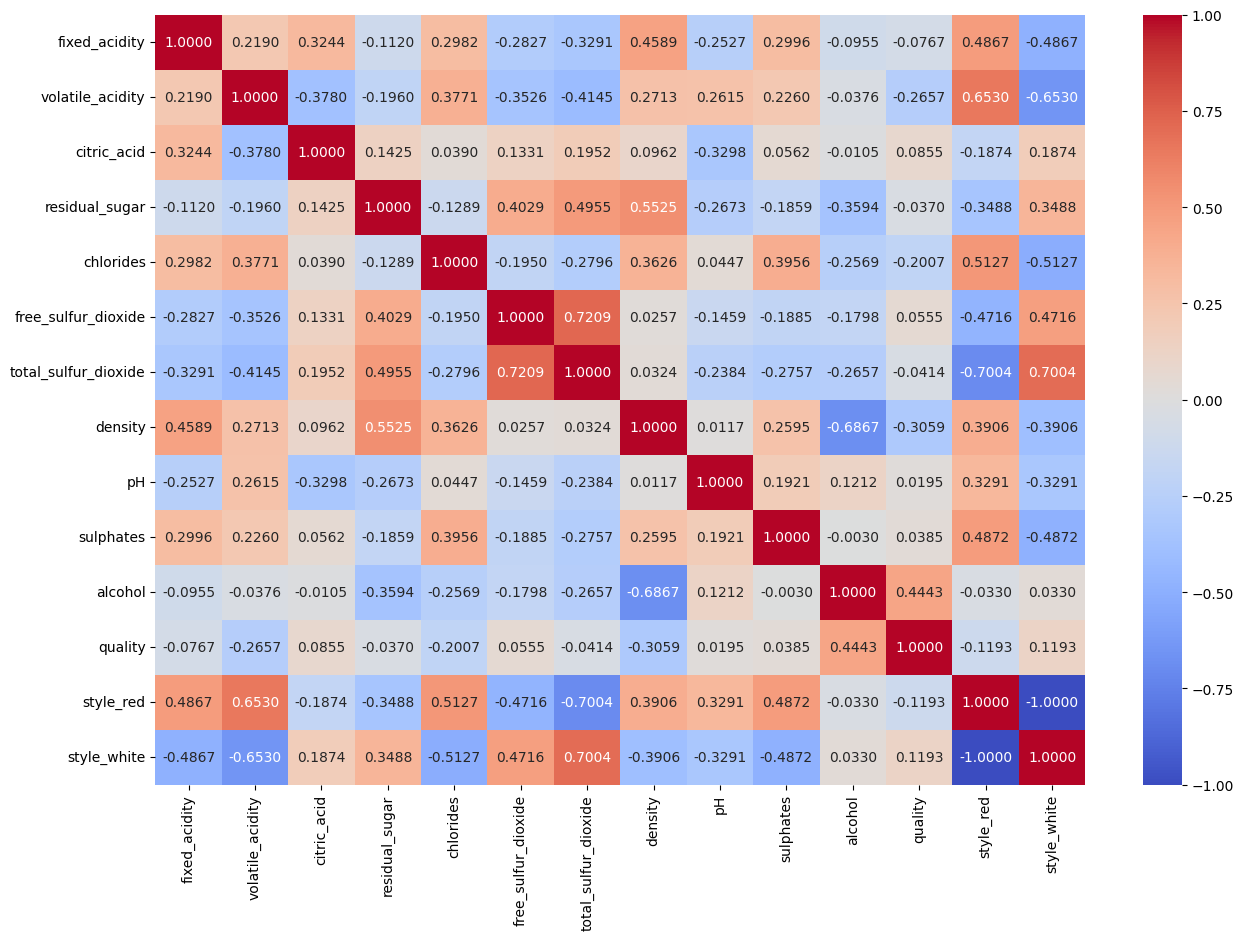

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(vinho.corr(), annot=True, fmt='.4f', cmap='coolwarm')
plt.show()

In [17]:
#verificando o balanceamento das classes
vinho['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

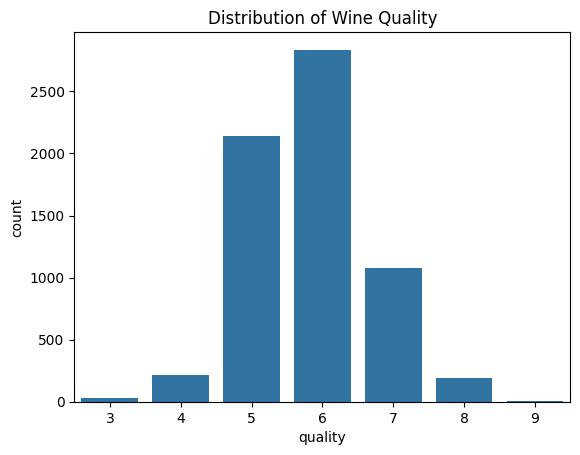

In [18]:
sns.countplot(x='quality', data=vinho)
plt.title('Distribution of Wine Quality')
plt.show()

<Axes: xlabel='quality'>

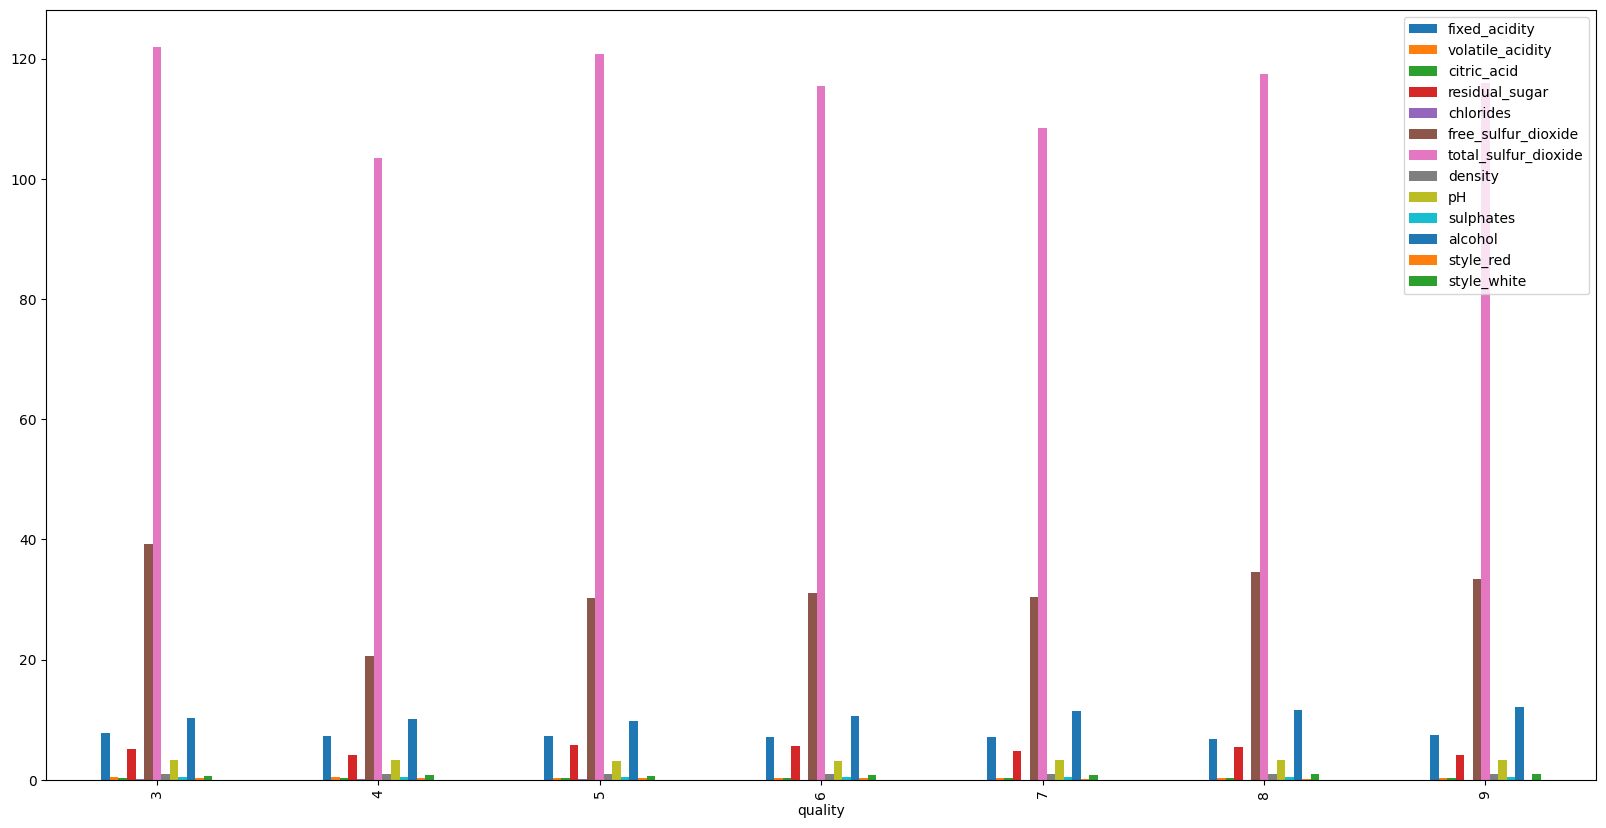

In [19]:
#Valores médios de cada classe
vinho.groupby("quality").mean().plot(kind="bar",figsize=(20,10))

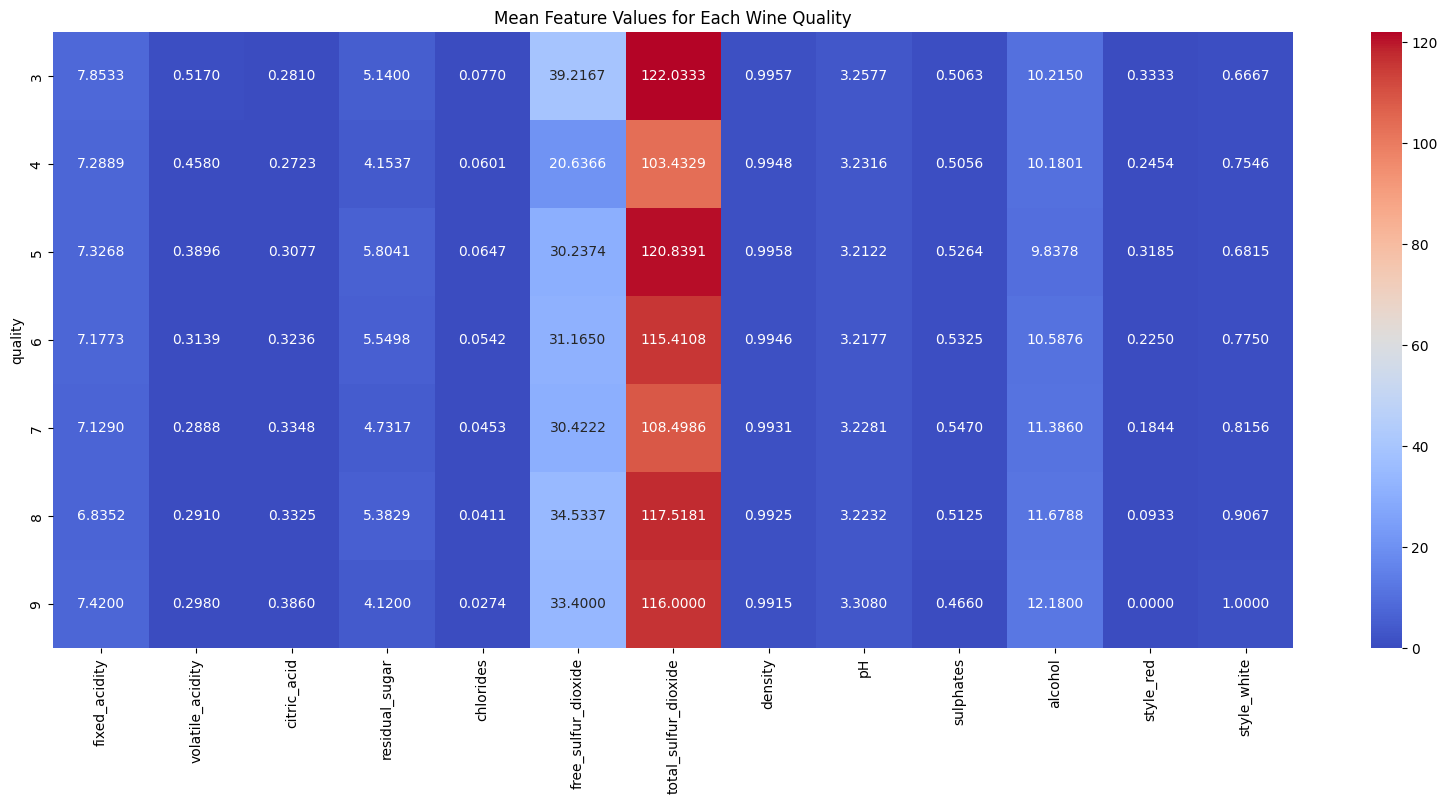

In [20]:
plt.figure(figsize=(20, 8))
sns.heatmap(vinho.groupby('quality').mean(), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Mean Feature Values for Each Wine Quality')
plt.show()

<Axes: xlabel='quality', ylabel='fixed_acidity'>

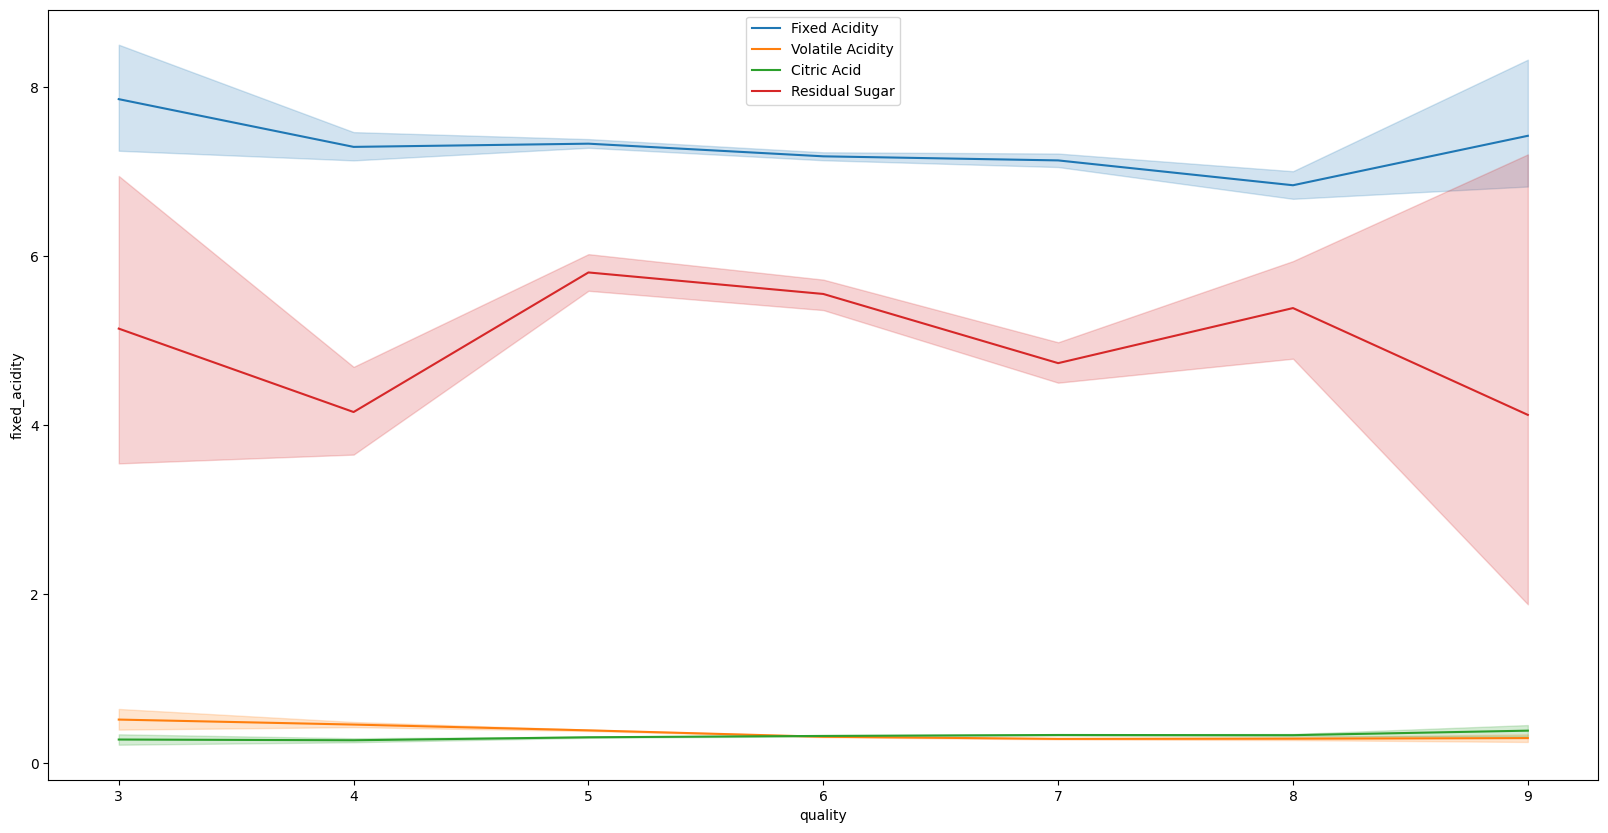

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(data=vinho, x="quality",y="fixed_acidity",label="Fixed Acidity")
sns.lineplot(data=vinho, x="quality",y="volatile_acidity",label="Volatile Acidity")
sns.lineplot(data=vinho, x="quality",y="citric_acid",label="Citric Acid")
sns.lineplot(data=vinho, x="quality",y="residual_sugar",label="Residual Sugar")

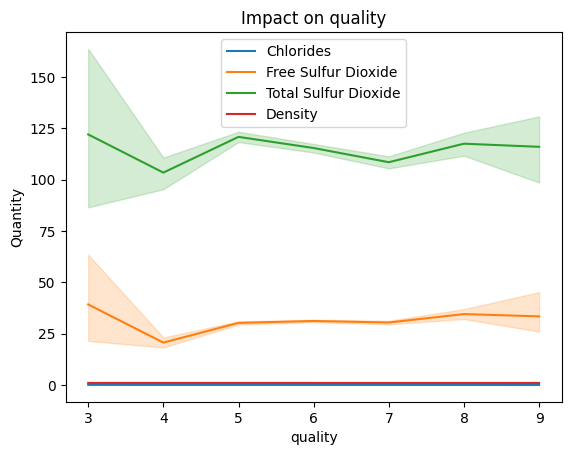

In [22]:
sns.lineplot(data=vinho, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=vinho, x="quality",y="free_sulfur_dioxide",label="Free Sulfur Dioxide")
sns.lineplot(data=vinho, x="quality",y="total_sulfur_dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=vinho, x="quality",y="density",label="Density")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

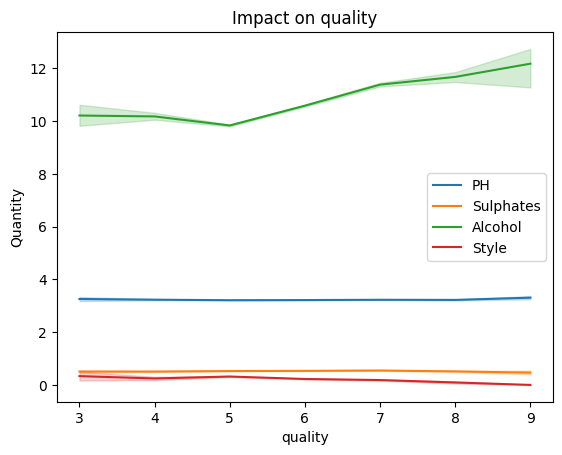

In [23]:
sns.lineplot(data=vinho, x="quality",y="pH",label="PH")
sns.lineplot(data=vinho, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=vinho, x="quality",y="alcohol",label="Alcohol")
sns.lineplot(data=vinho, x="quality",y="style_red",label="Style")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

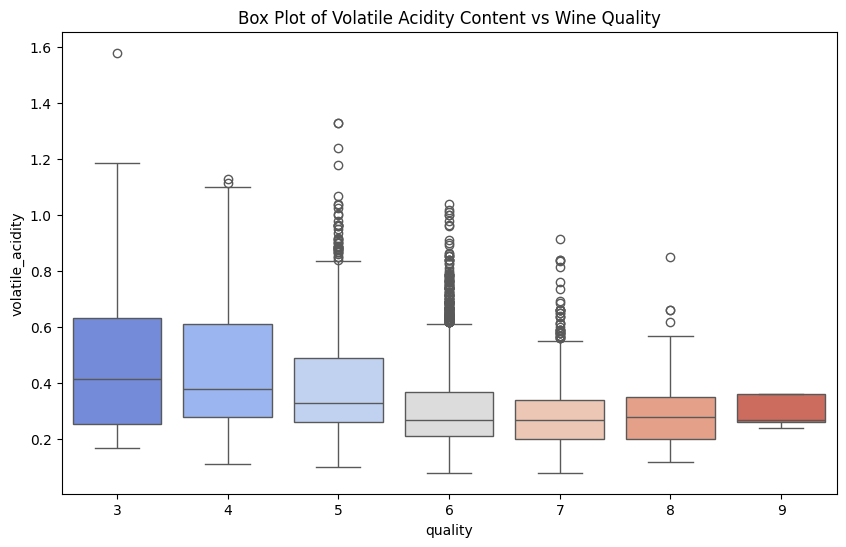

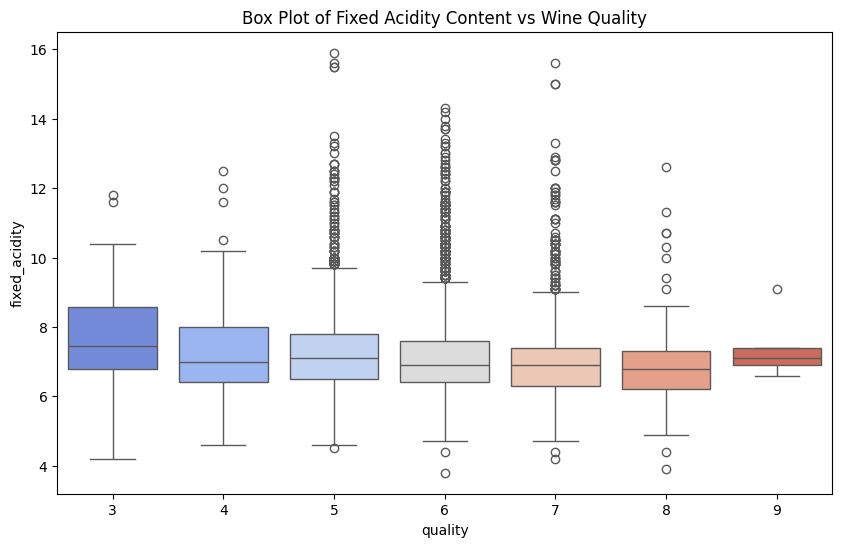

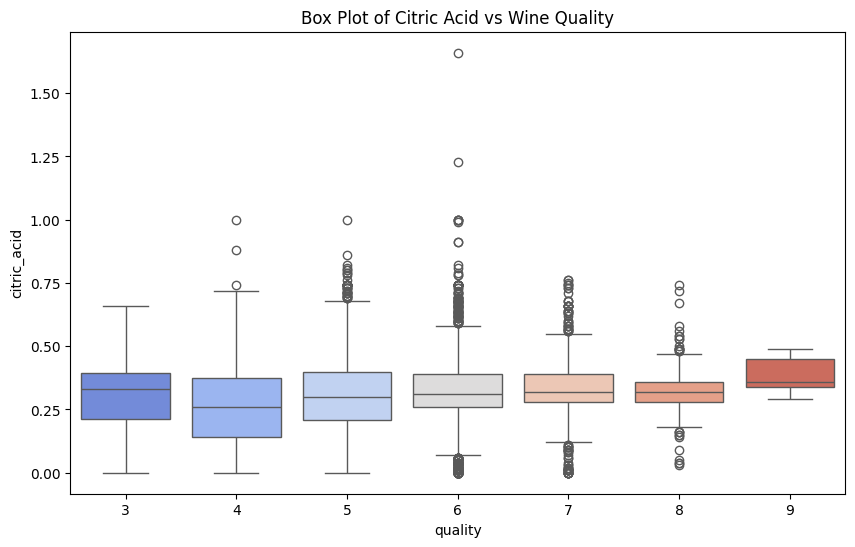

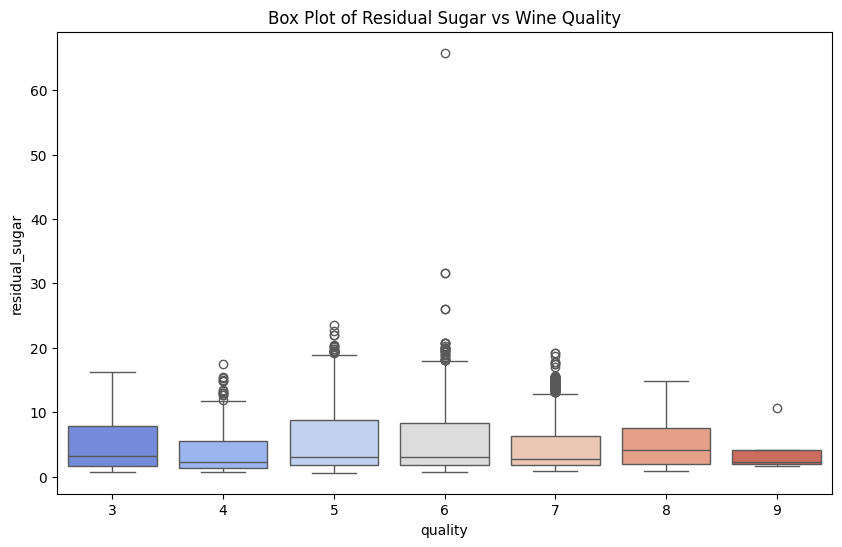

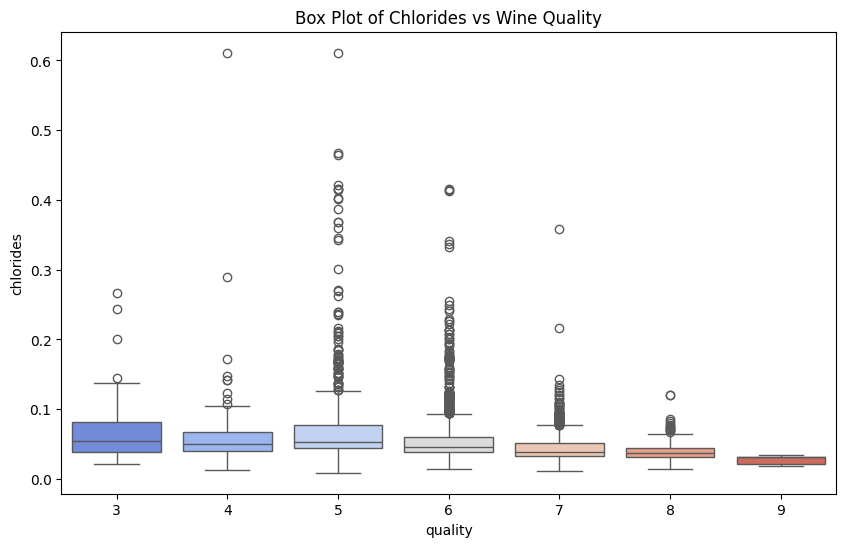

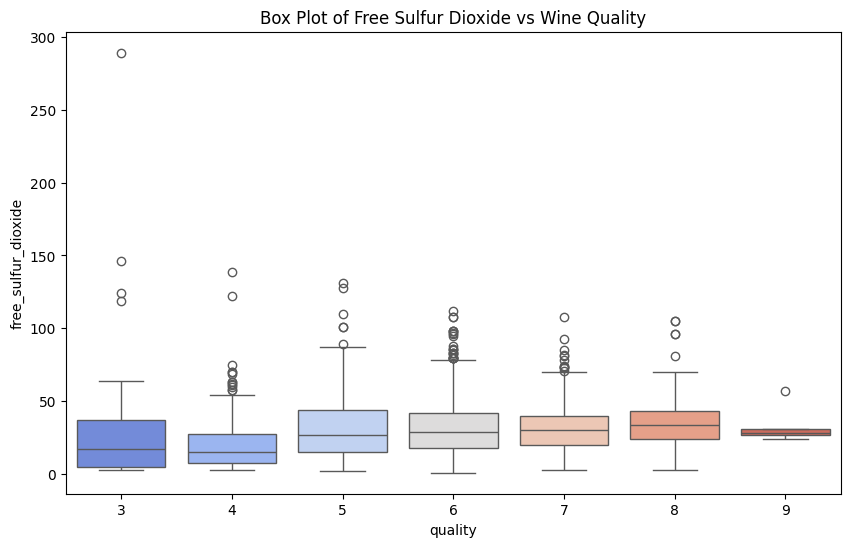

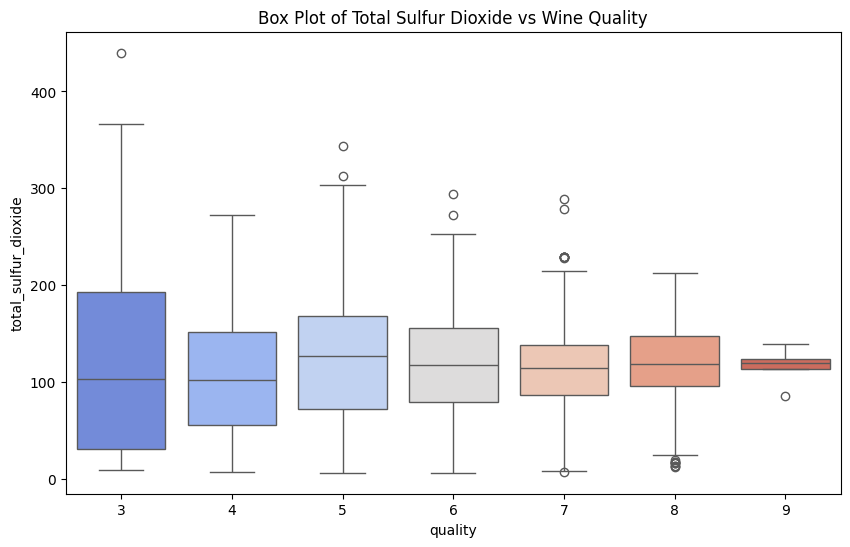

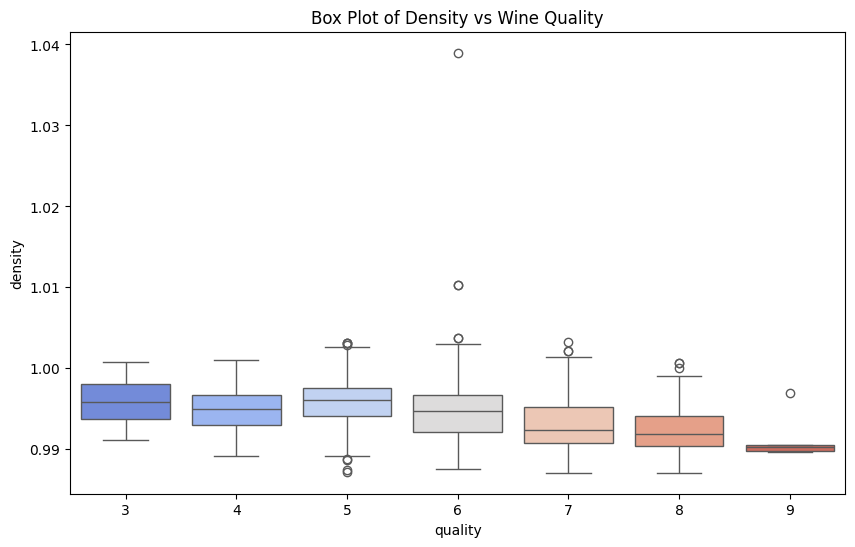

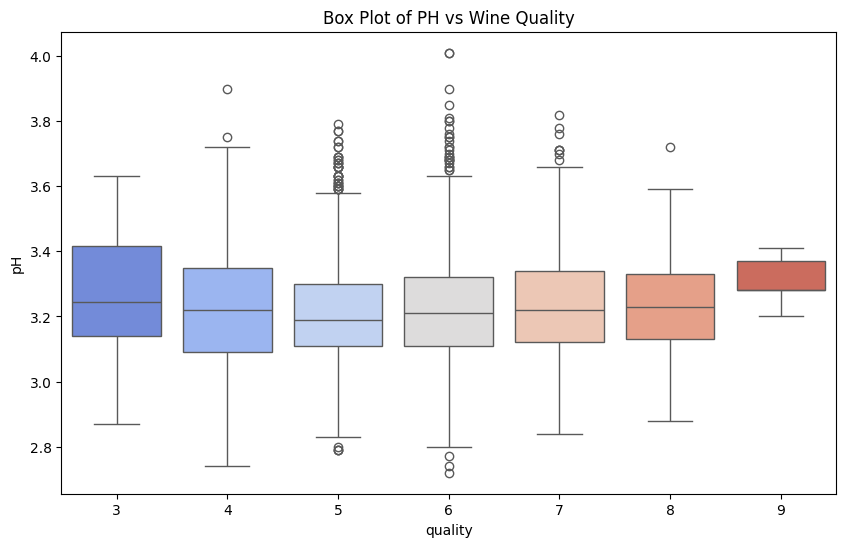

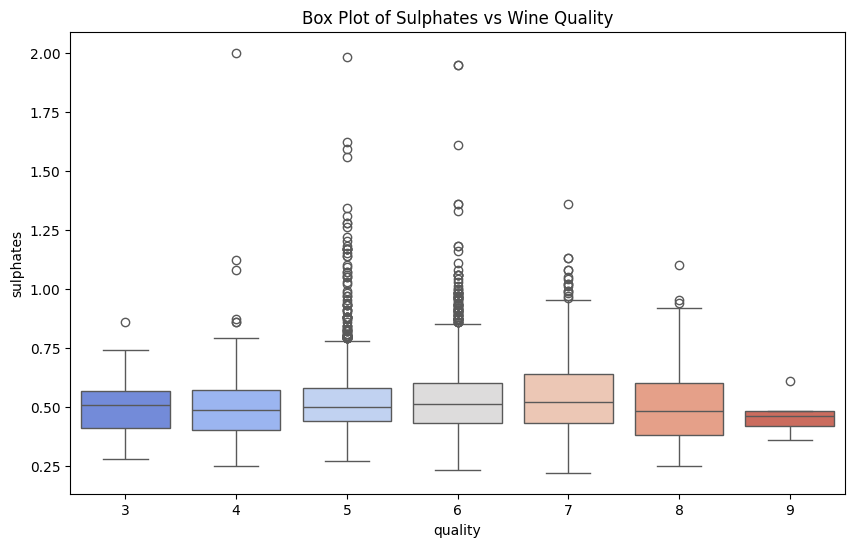

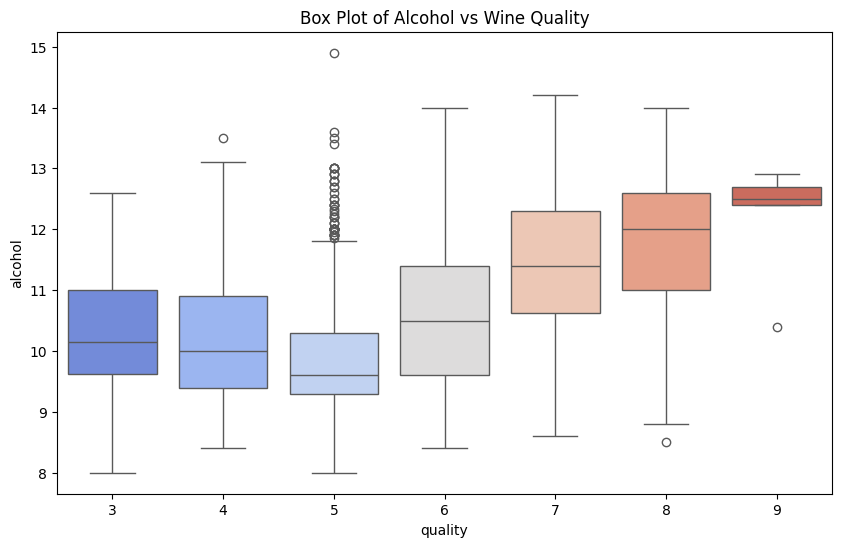

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile_acidity', data=vinho, palette='coolwarm')
plt.title('Box Plot of Volatile Acidity Content vs Wine Quality')
plt.show()
             
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed_acidity', data=vinho, palette='coolwarm')
plt.title('Box Plot of Fixed Acidity Content vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric_acid', data=vinho, palette='coolwarm')
plt.title('Box Plot of Citric Acid vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='residual_sugar', data=vinho, palette='coolwarm')
plt.title('Box Plot of Residual Sugar vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='chlorides', data=vinho, palette='coolwarm')
plt.title('Box Plot of Chlorides vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='free_sulfur_dioxide', data=vinho, palette='coolwarm')
plt.title('Box Plot of Free Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='total_sulfur_dioxide', data=vinho, palette='coolwarm')
plt.title('Box Plot of Total Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=vinho, palette='coolwarm')
plt.title('Box Plot of Density vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=vinho, palette='coolwarm')
plt.title('Box Plot of PH vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', data=vinho, palette='coolwarm')
plt.title('Box Plot of Sulphates vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=vinho, palette='coolwarm')
plt.title('Box Plot of Alcohol vs Wine Quality')
plt.show()


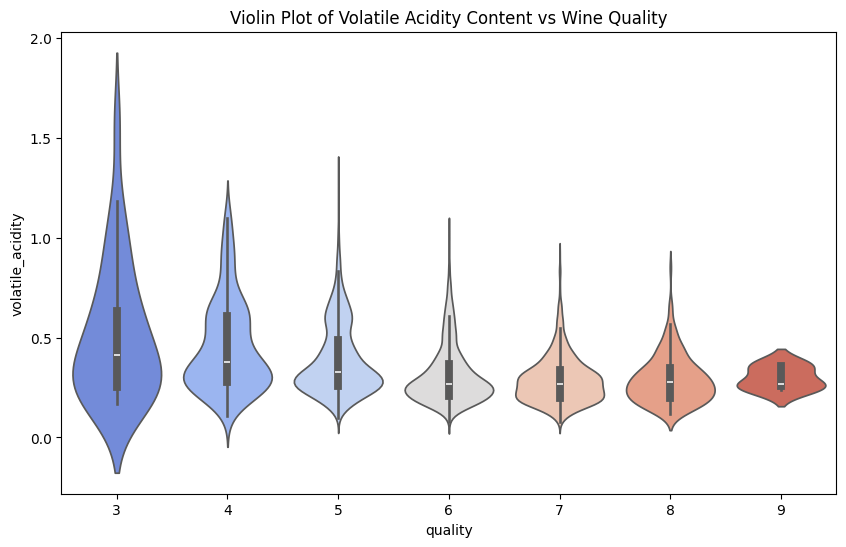

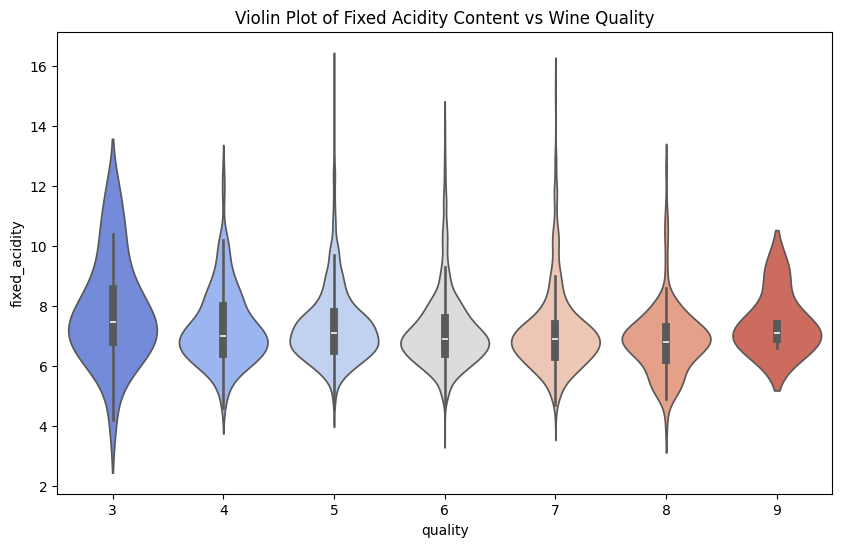

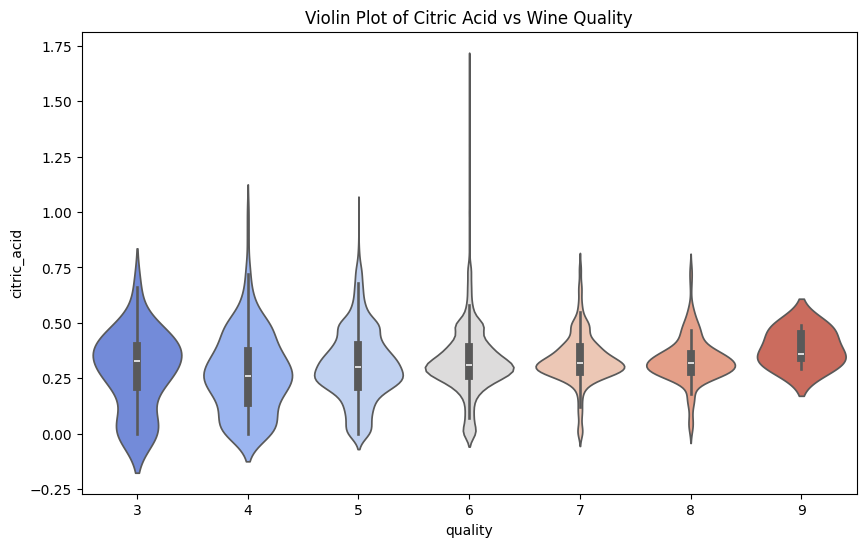

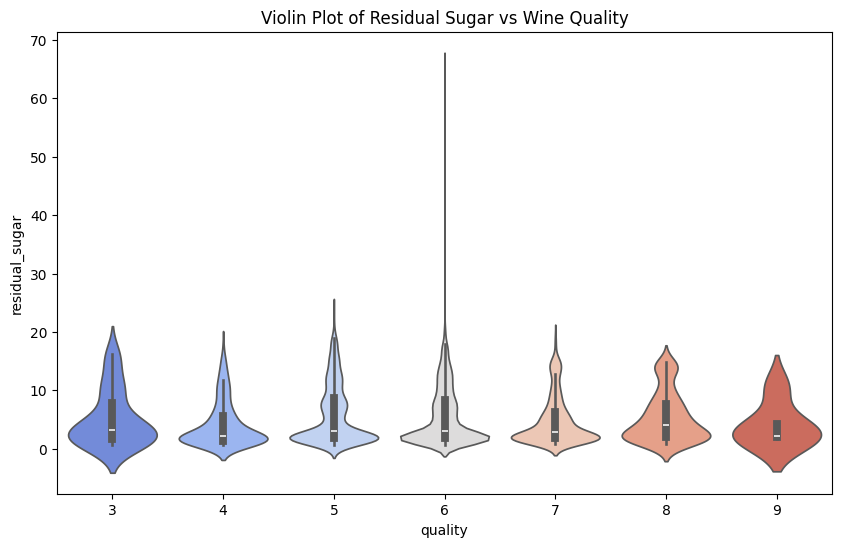

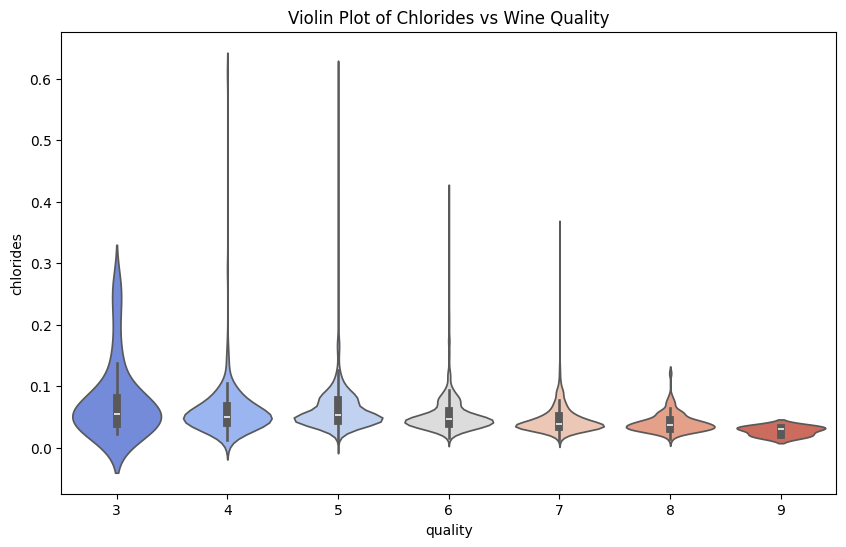

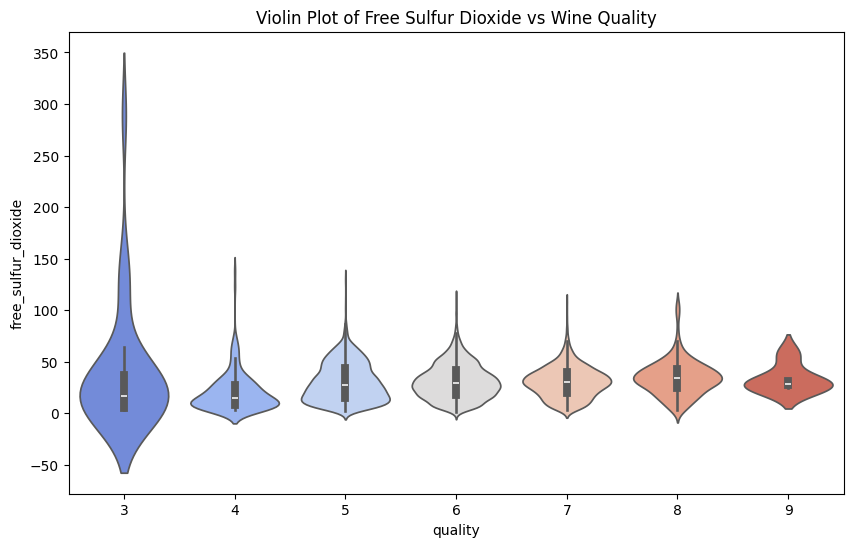

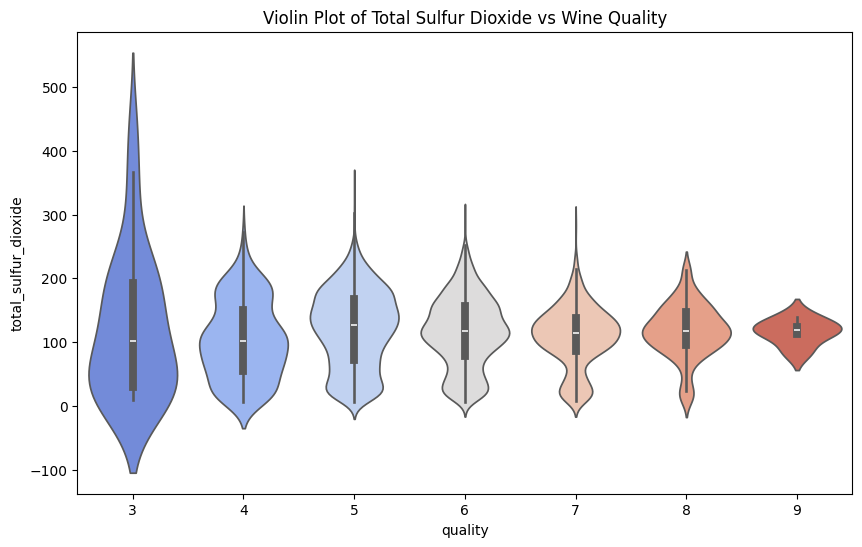

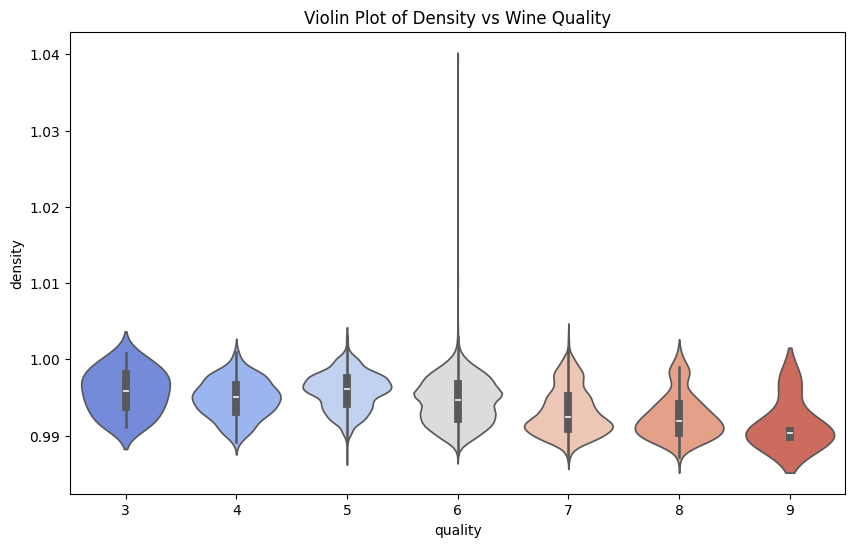

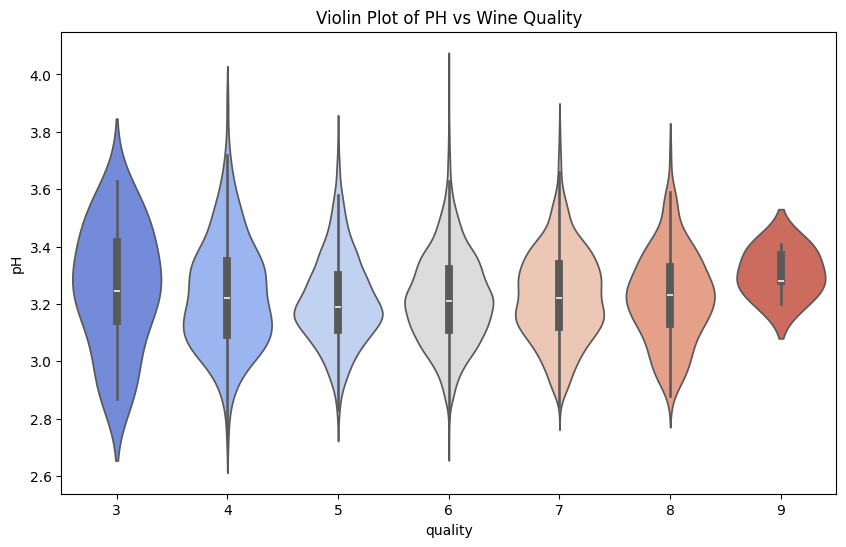

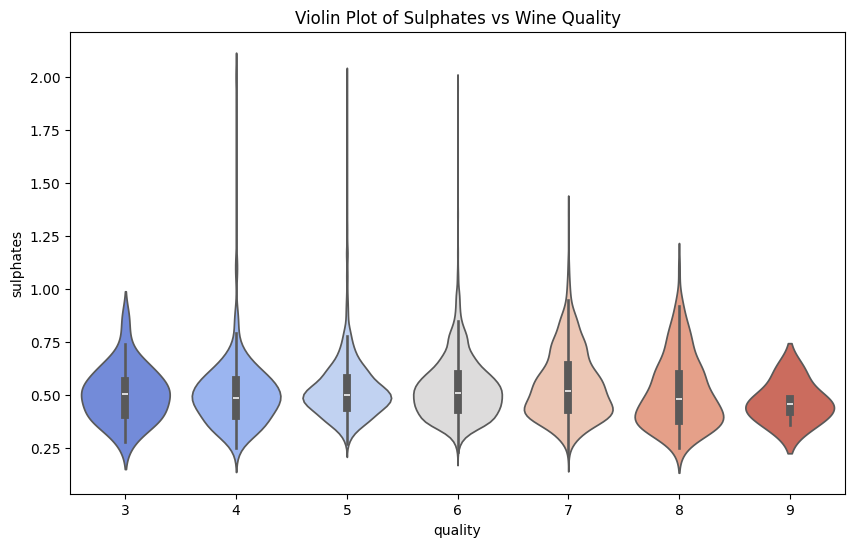

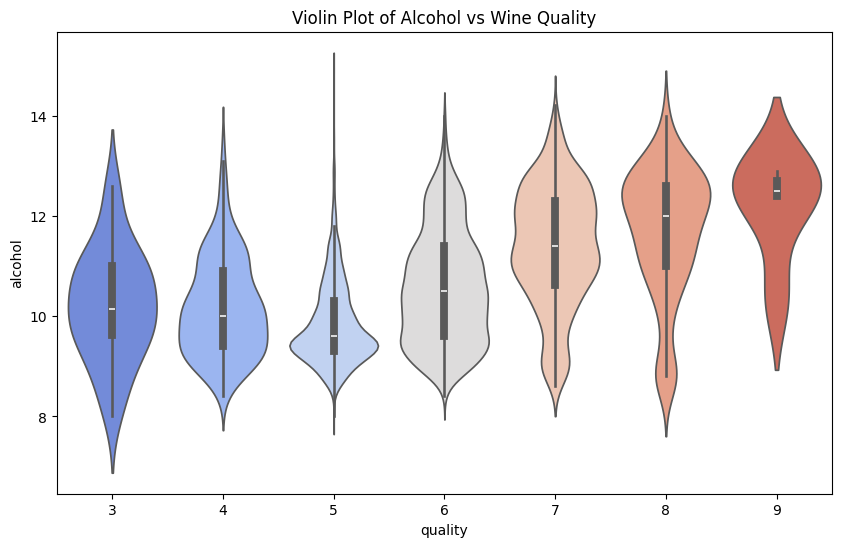

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='volatile_acidity', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Volatile Acidity Content vs Wine Quality')
plt.show()
             
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='fixed_acidity', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Fixed Acidity Content vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='citric_acid', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Citric Acid vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='residual_sugar', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Residual Sugar vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='chlorides', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Chlorides vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='free_sulfur_dioxide', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Free Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='total_sulfur_dioxide', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Total Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='density', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Density vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='pH', data=vinho, palette='coolwarm')
plt.title('Violin Plot of PH vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='sulphates', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Sulphates vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=vinho, palette='coolwarm')
plt.title('Violin Plot of Alcohol vs Wine Quality')
plt.show()

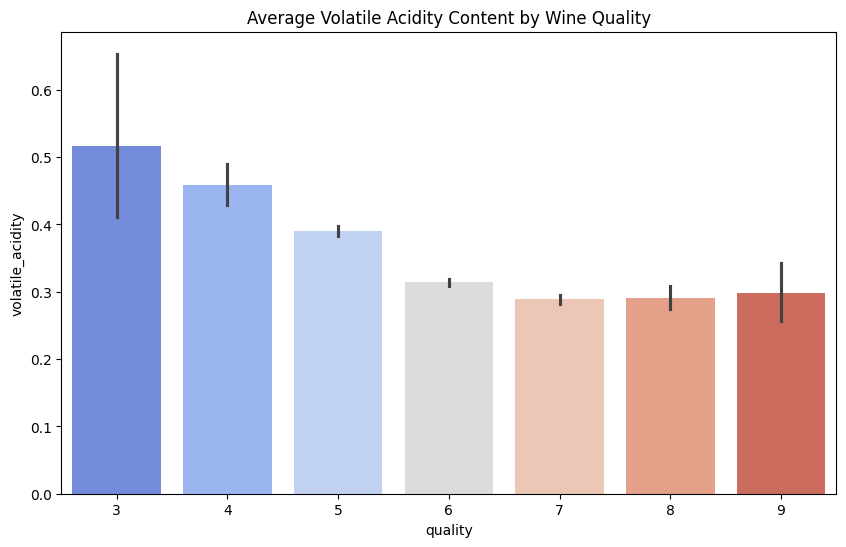

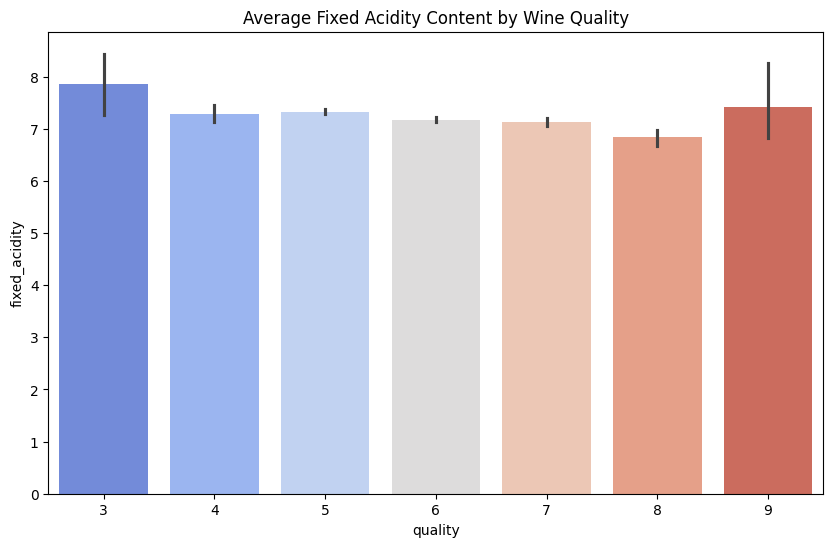

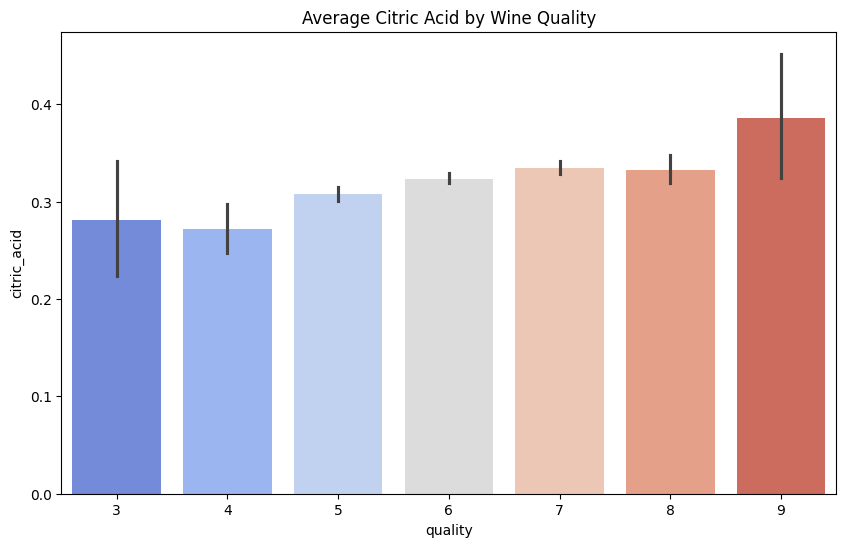

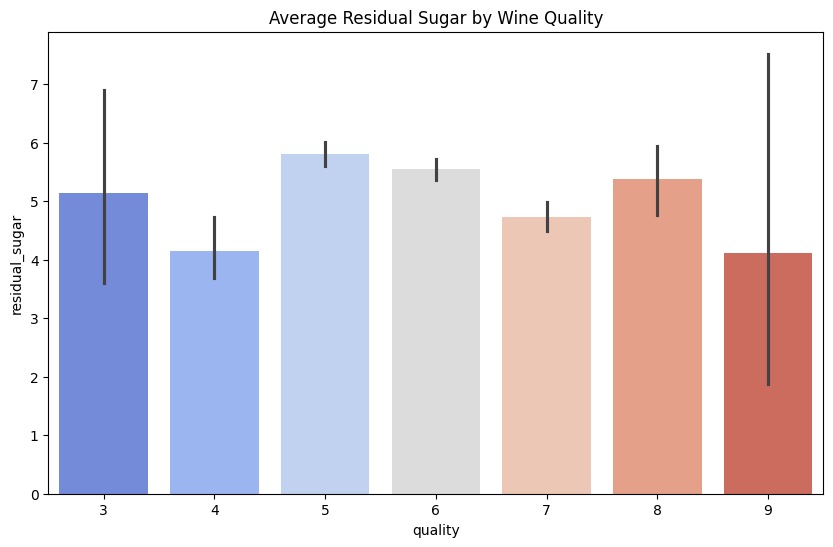

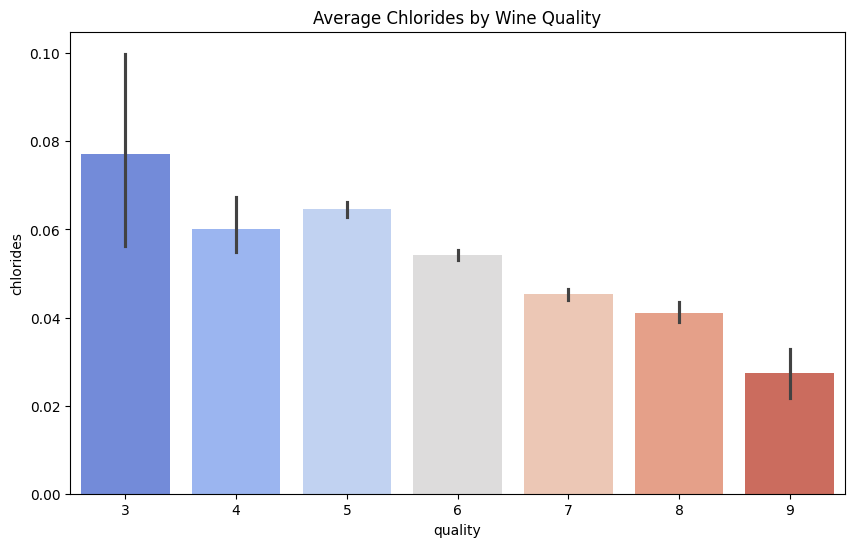

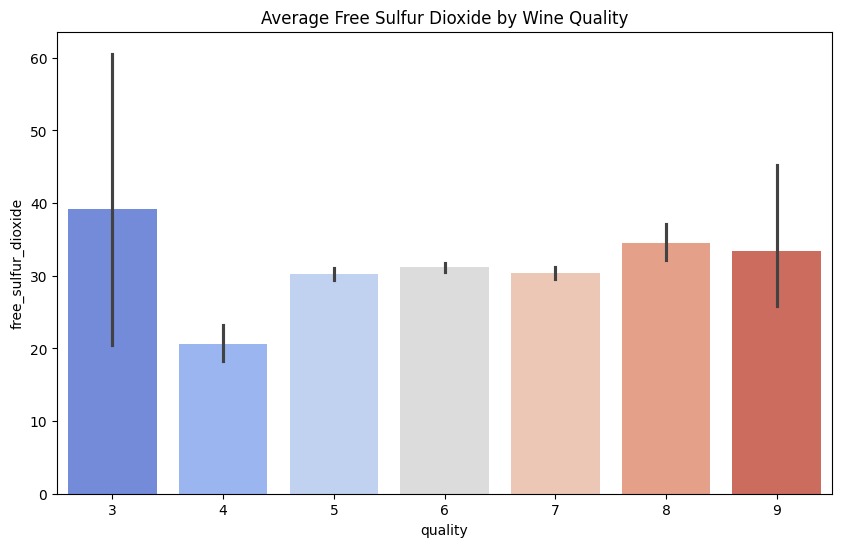

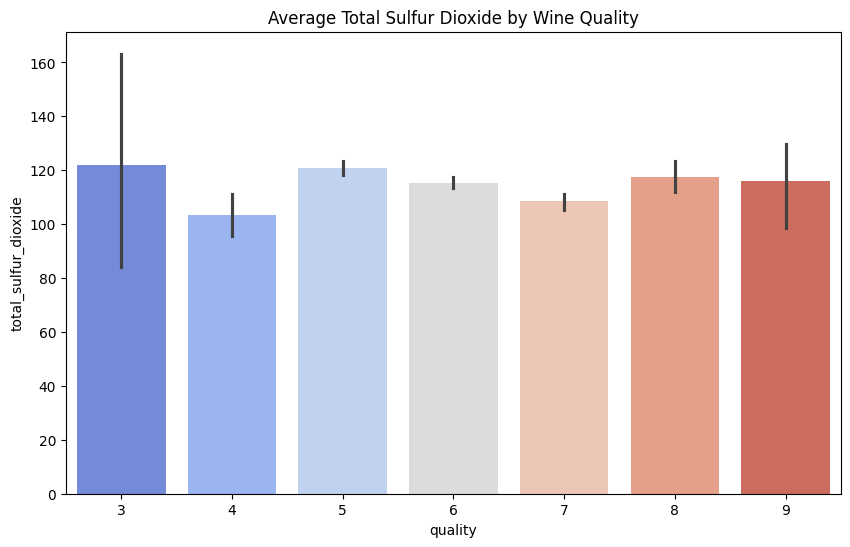

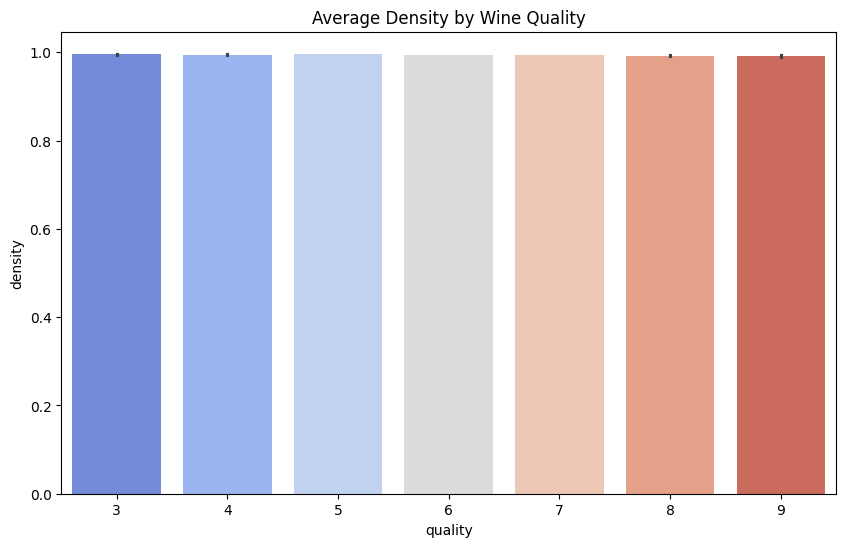

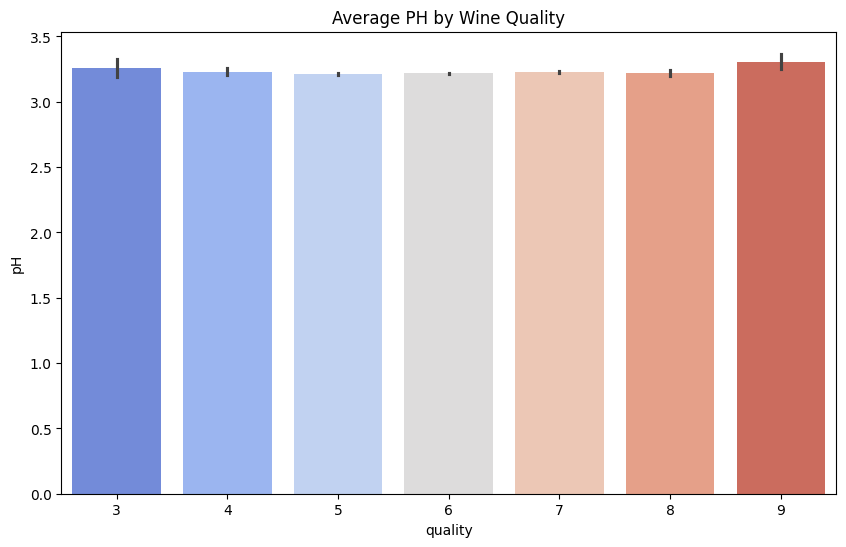

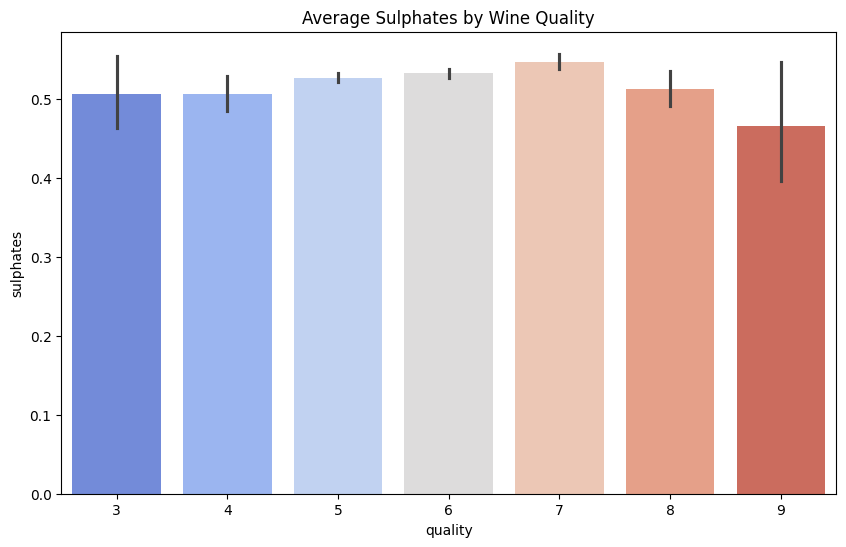

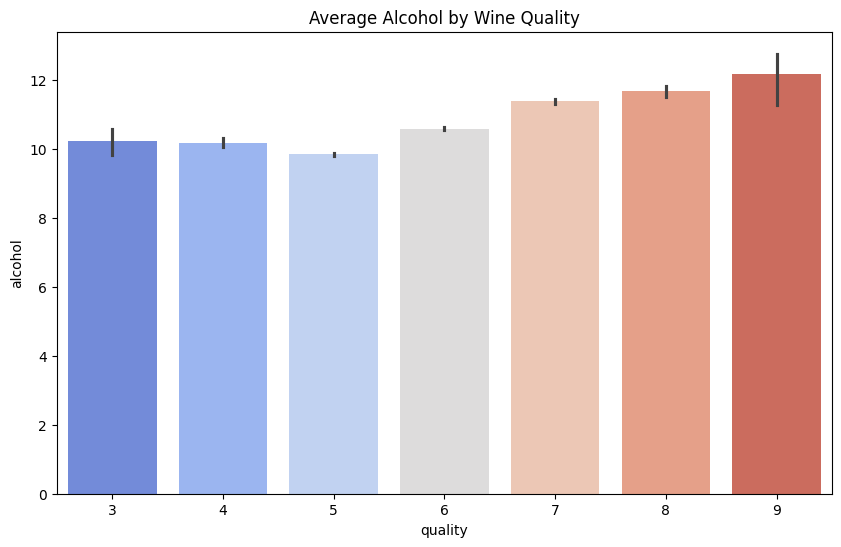

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile_acidity', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Volatile Acidity Content by Wine Quality')
plt.show()
             
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed_acidity', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Fixed Acidity Content by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric_acid', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Citric Acid by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual_sugar', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Residual Sugar by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Chlorides by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free_sulfur_dioxide', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Free Sulfur Dioxide by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total_sulfur_dioxide', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Total Sulfur Dioxide by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='density', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Density by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='pH', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average PH by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Sulphates by Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=vinho, palette='coolwarm', estimator='mean')
plt.title('Average Alcohol by Wine Quality')
plt.show()

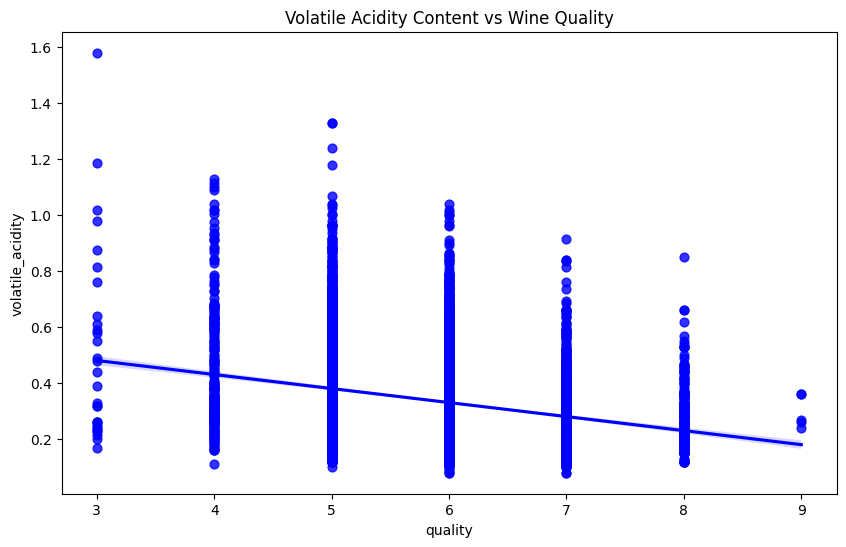

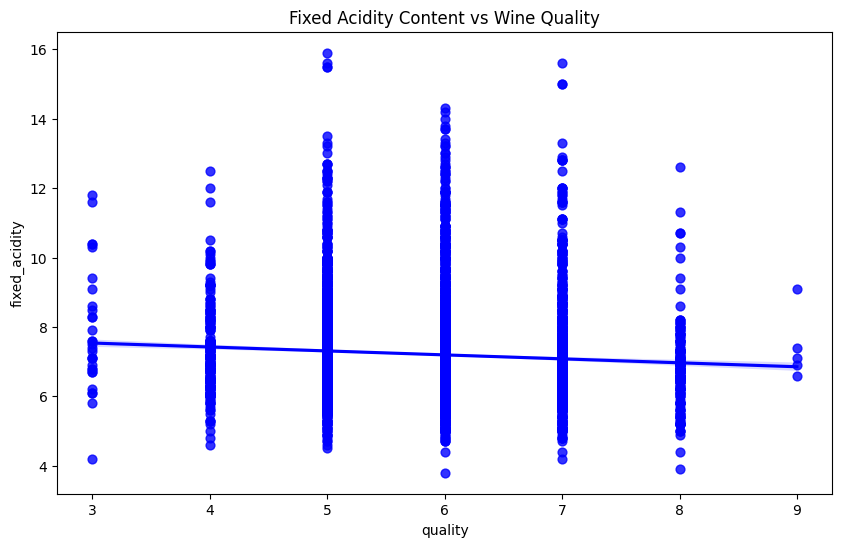

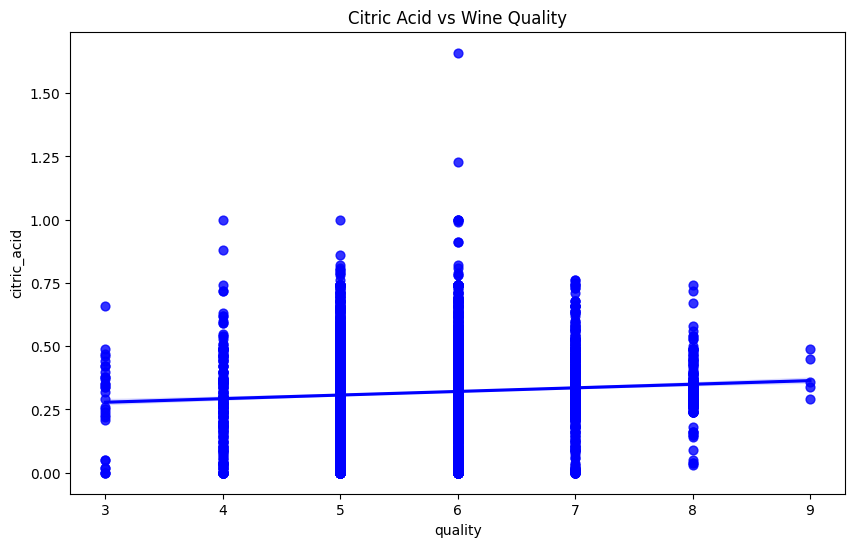

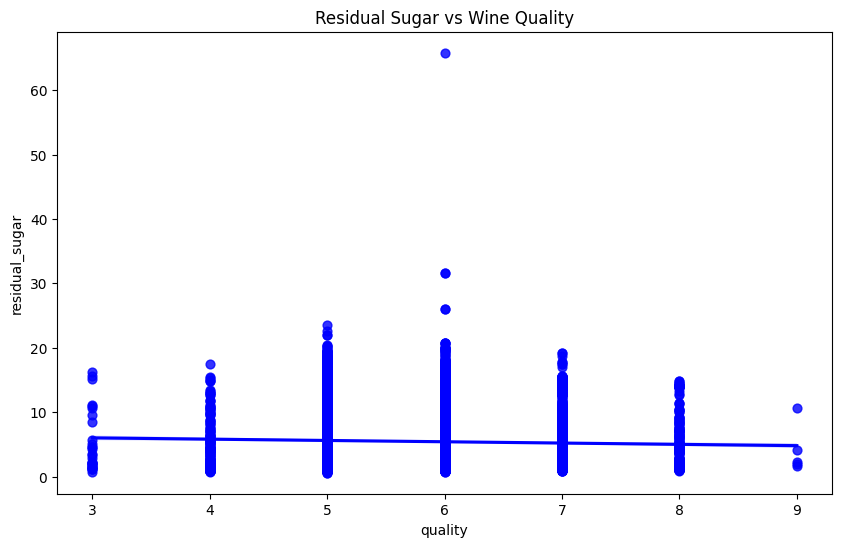

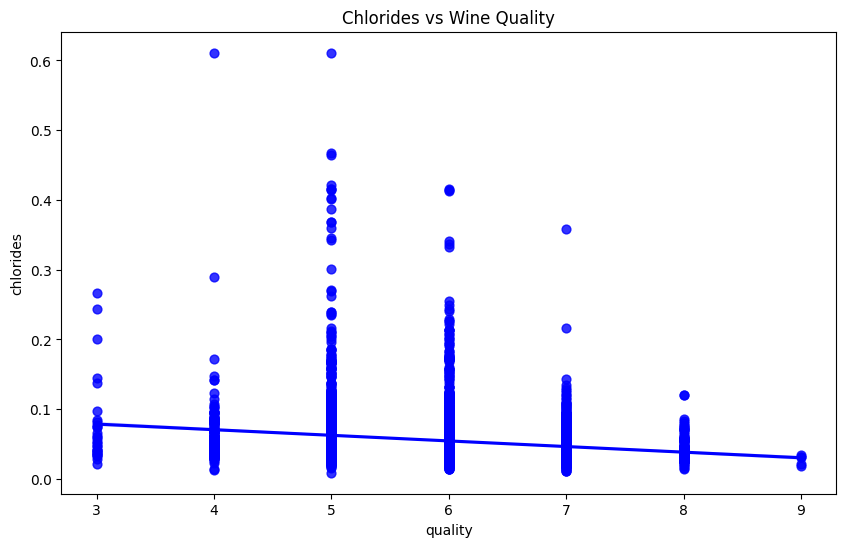

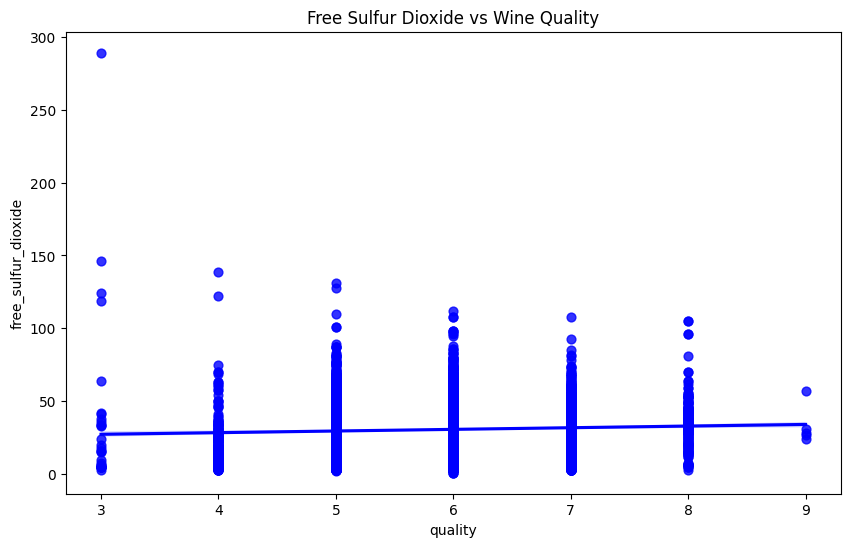

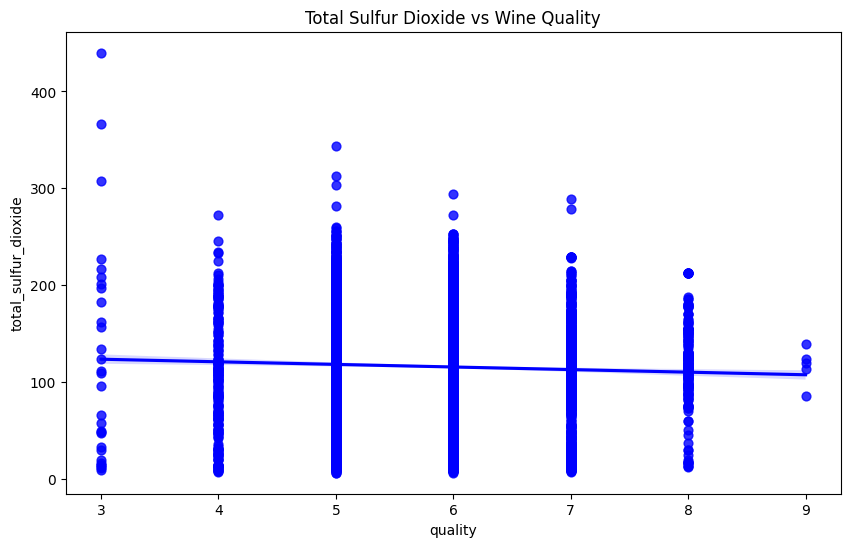

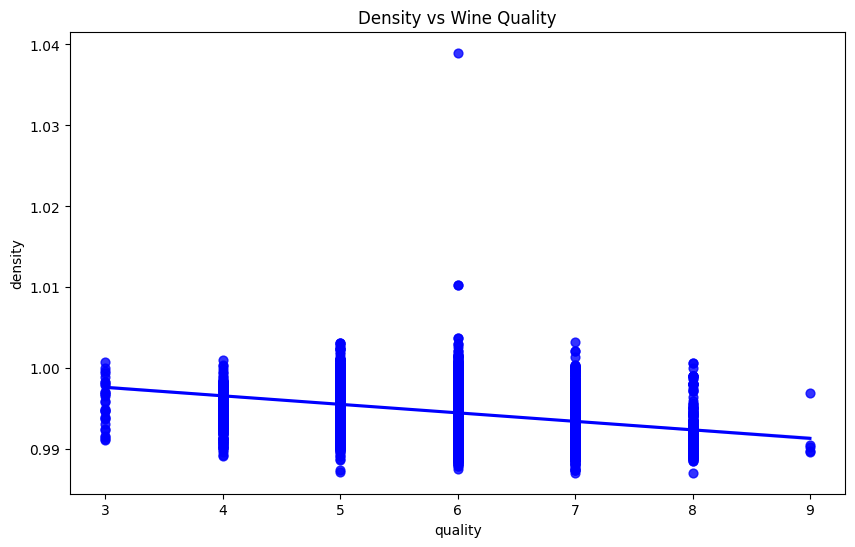

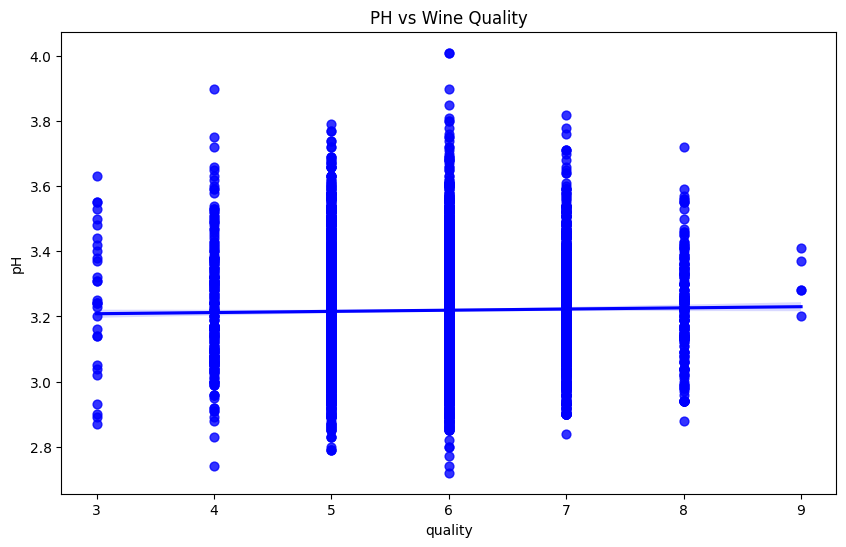

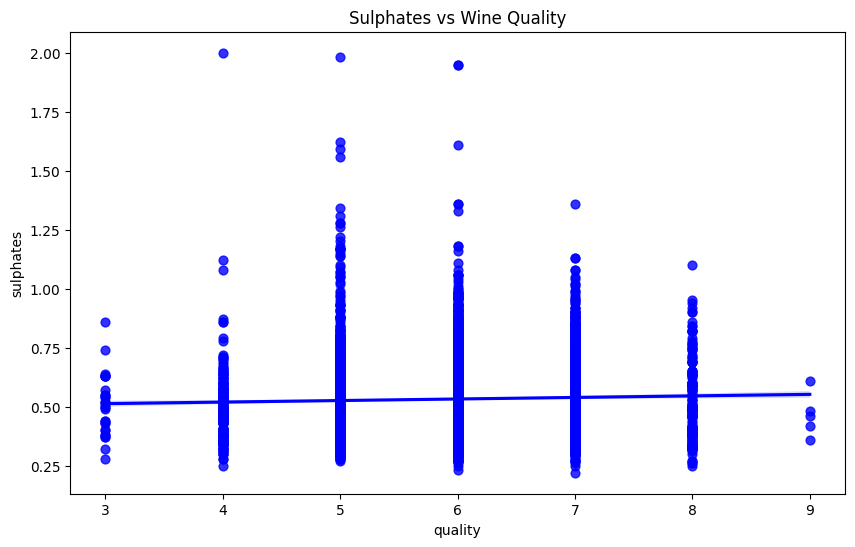

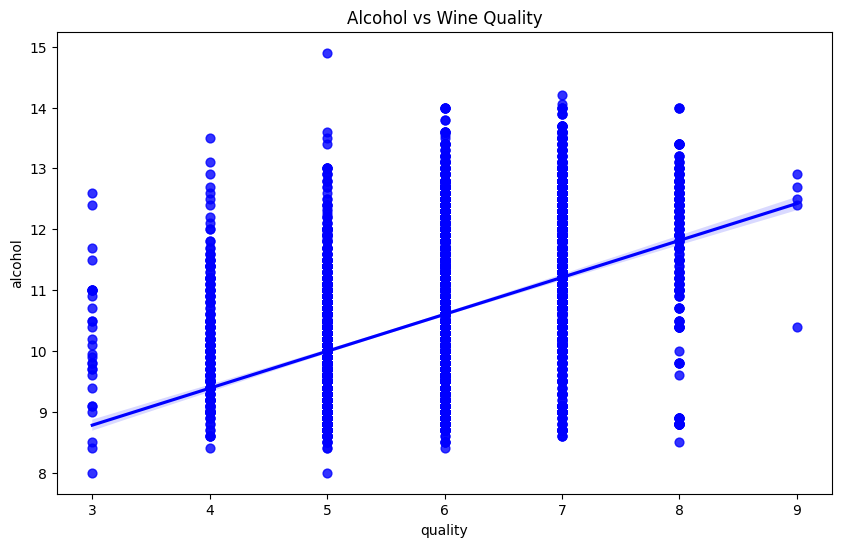

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='volatile_acidity', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Volatile Acidity Content vs Wine Quality')
plt.show()
             
plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='fixed_acidity', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Fixed Acidity Content vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='citric_acid', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Citric Acid vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='residual_sugar', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Residual Sugar vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='chlorides', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Chlorides vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='free_sulfur_dioxide', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Free Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='total_sulfur_dioxide', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Total Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='density', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Density vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='pH', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('PH vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='sulphates', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Sulphates vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='alcohol', data=vinho, scatter_kws={'s': 40}, color='blue')
plt.title('Alcohol vs Wine Quality')
plt.show()

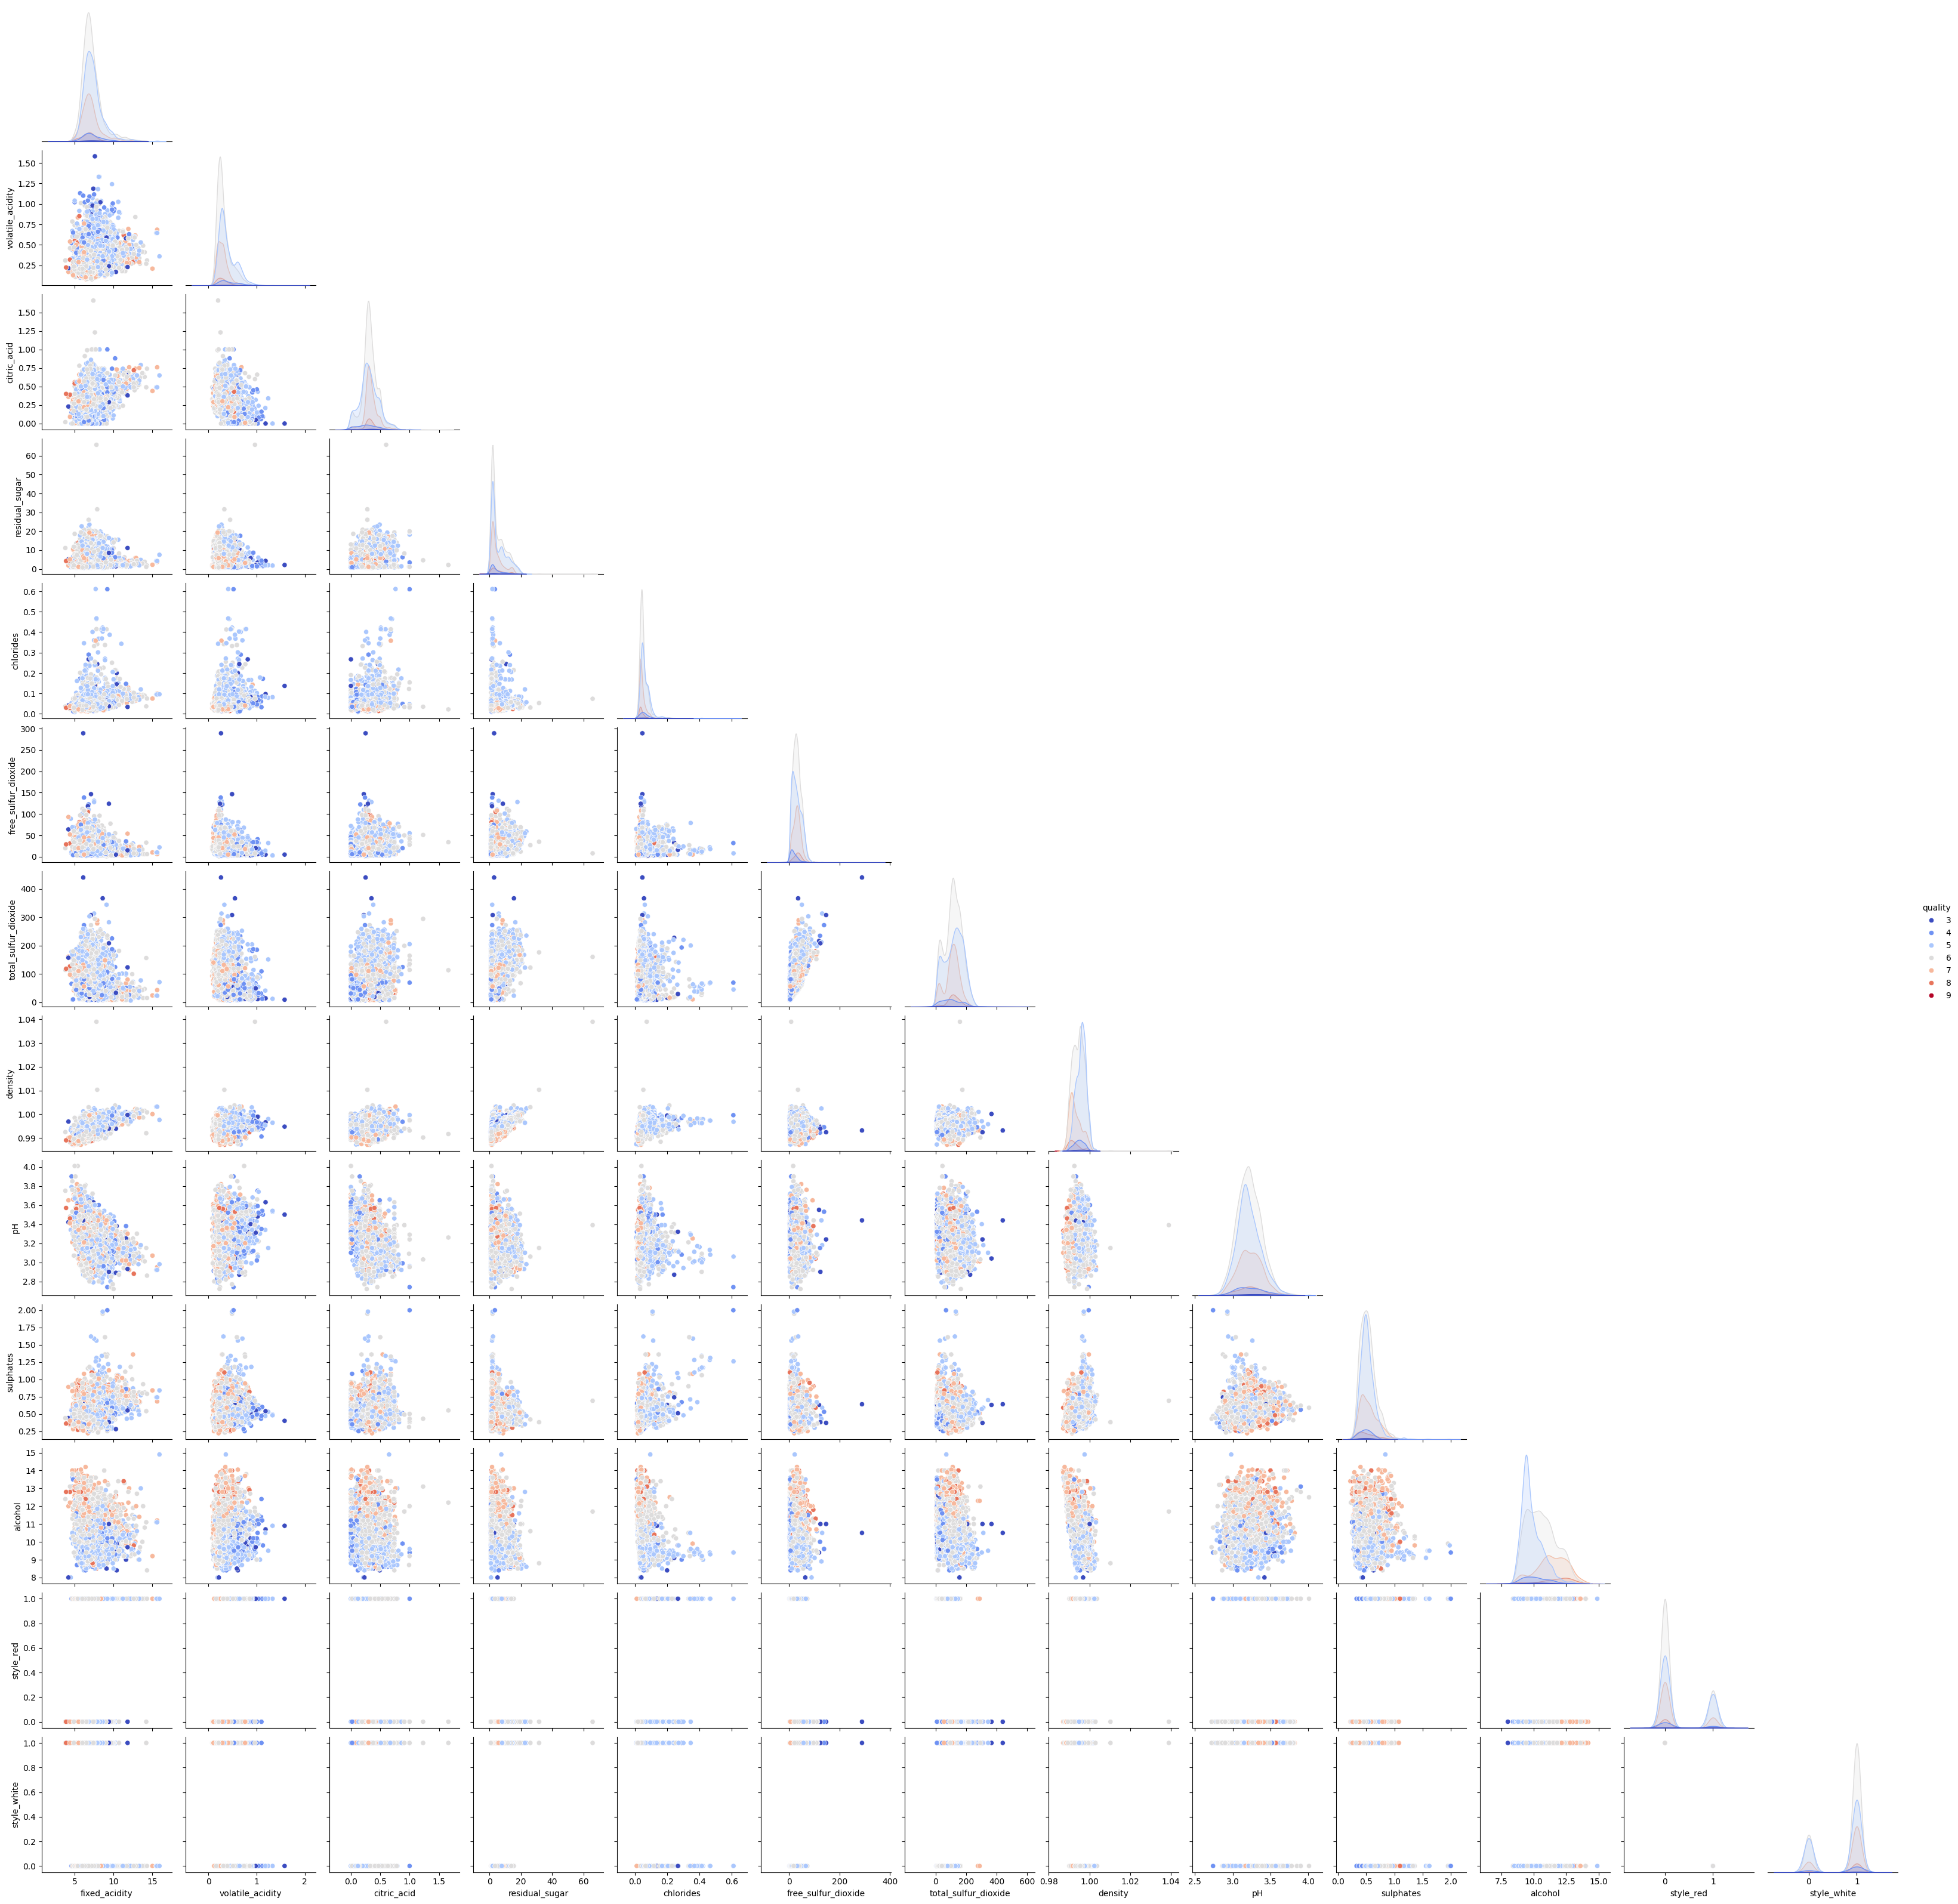

In [28]:
sns.pairplot(vinho, hue='quality', corner = True, palette='coolwarm')

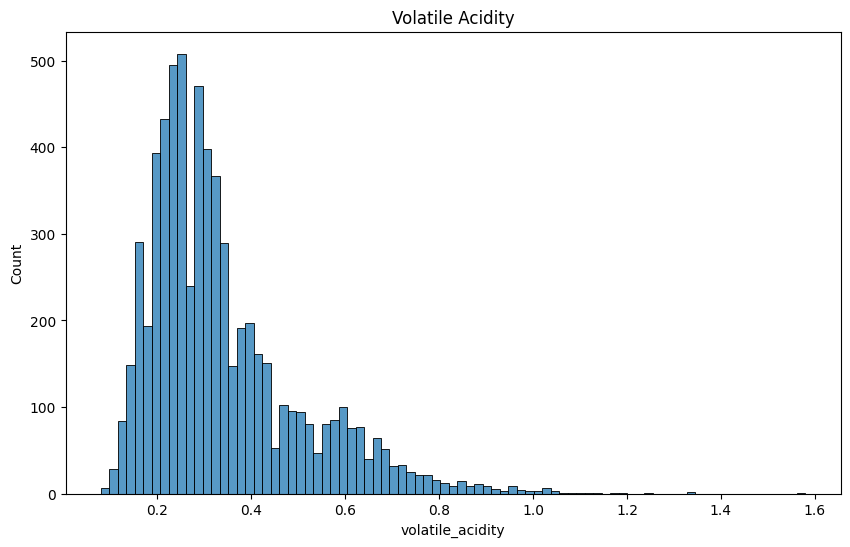

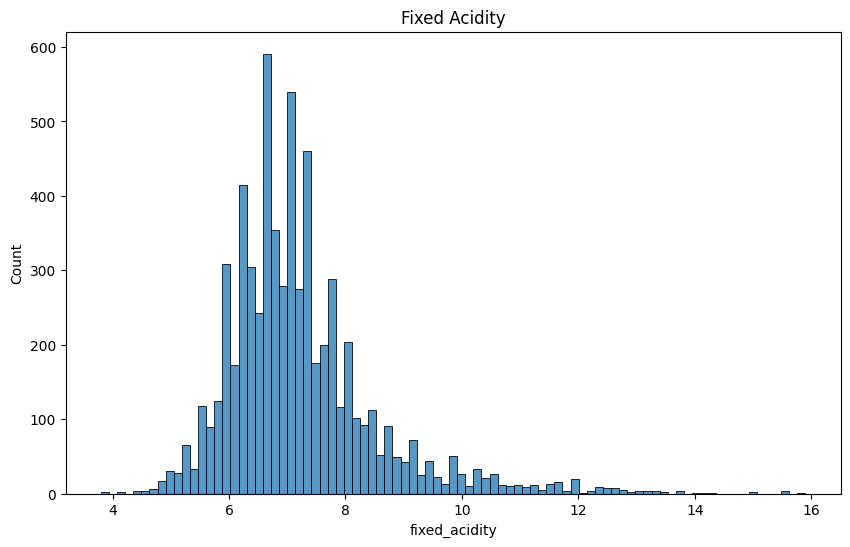

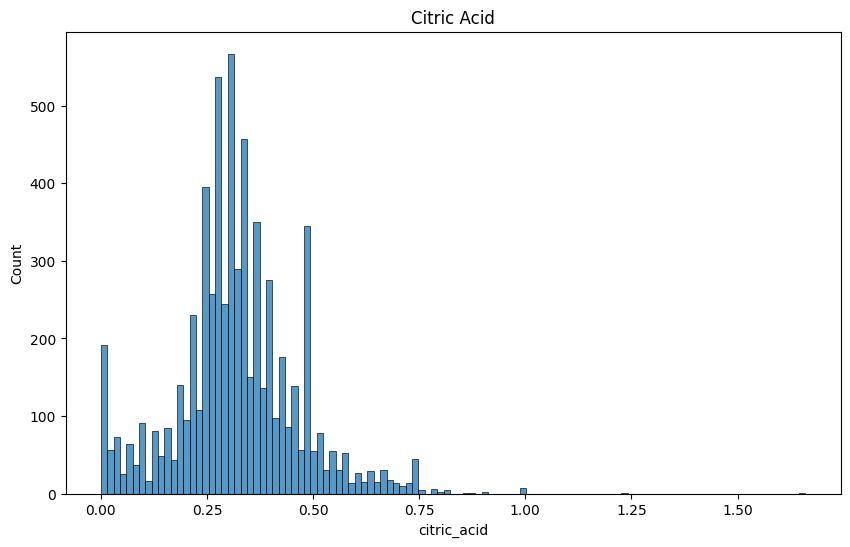

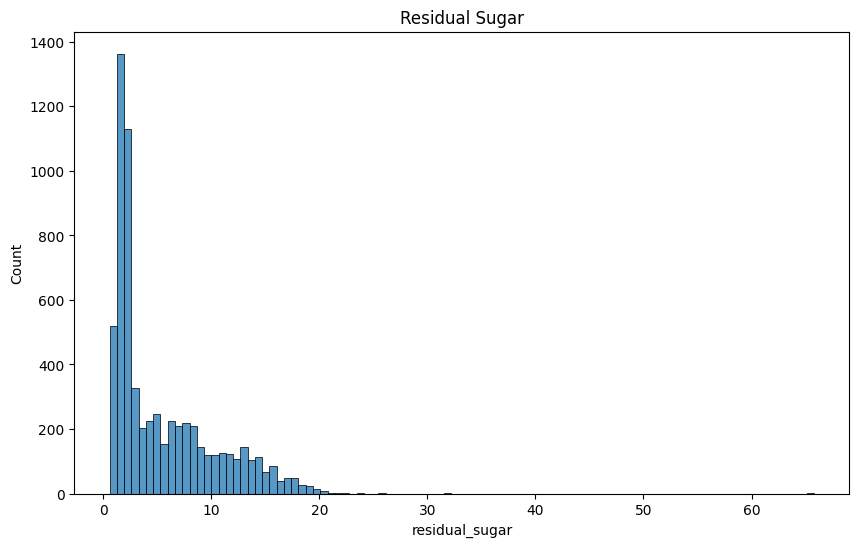

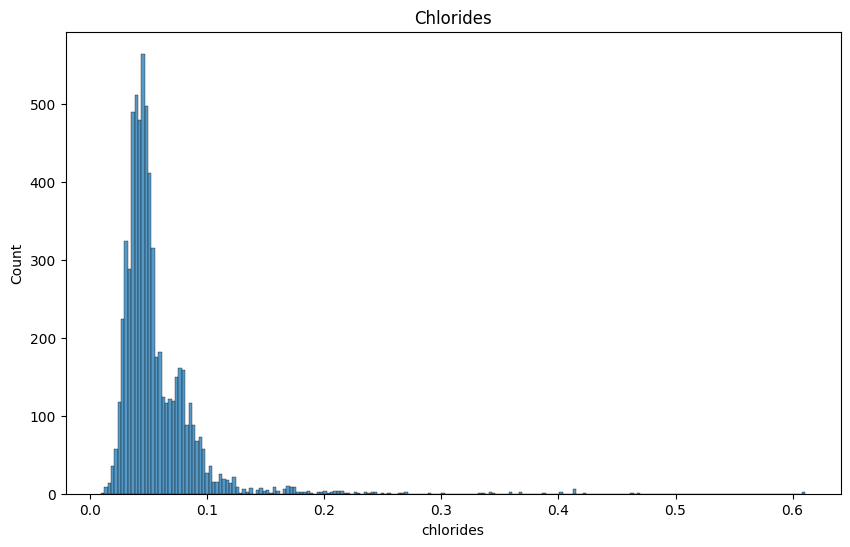

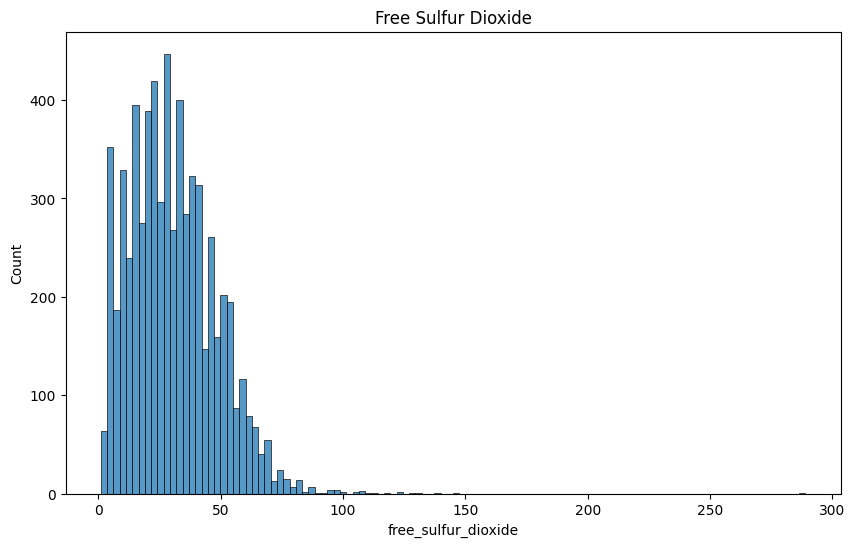

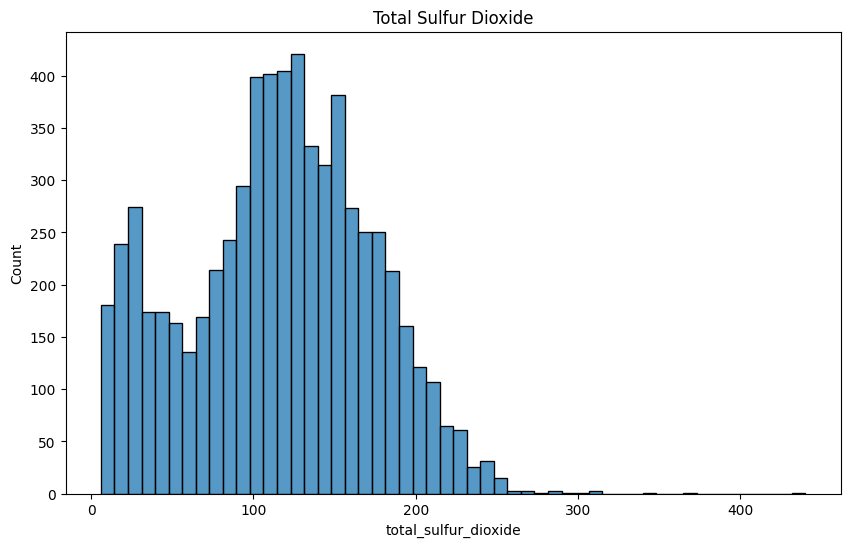

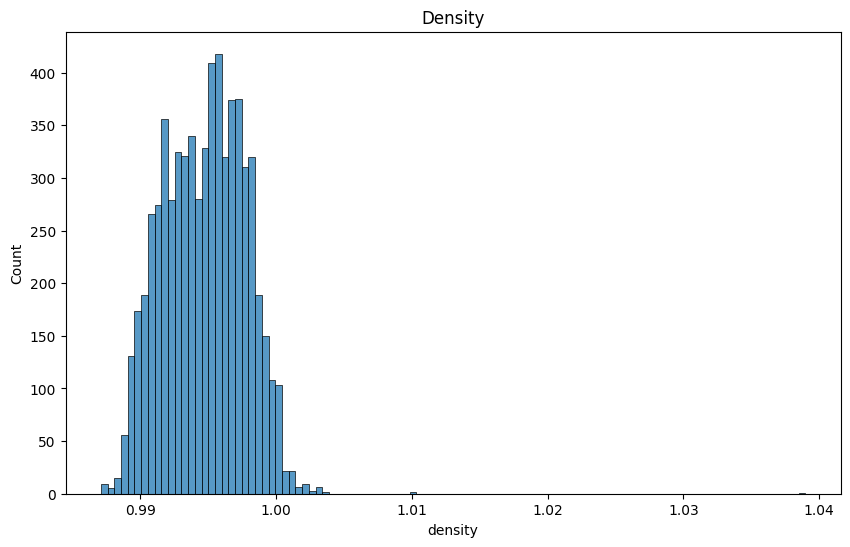

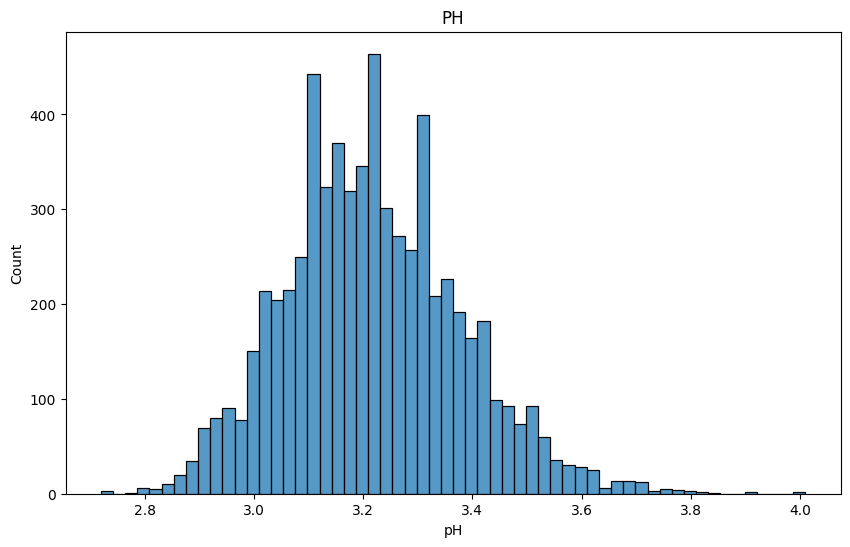

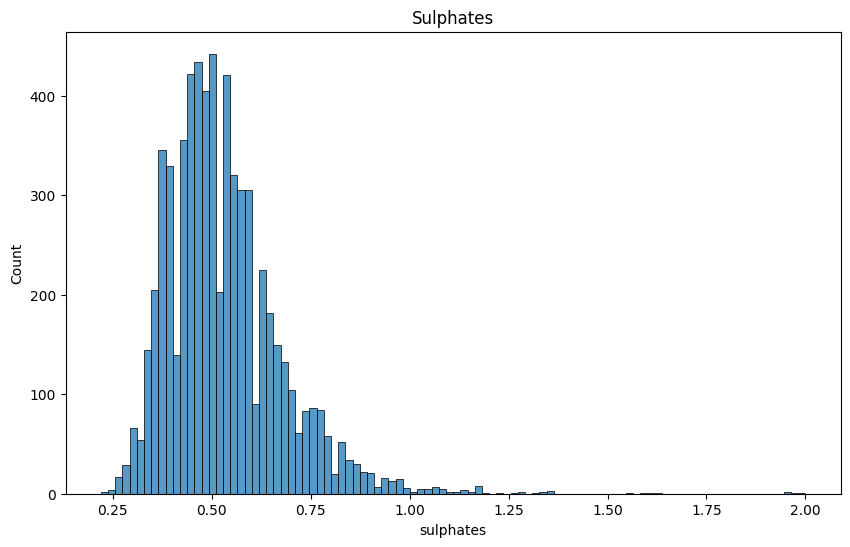

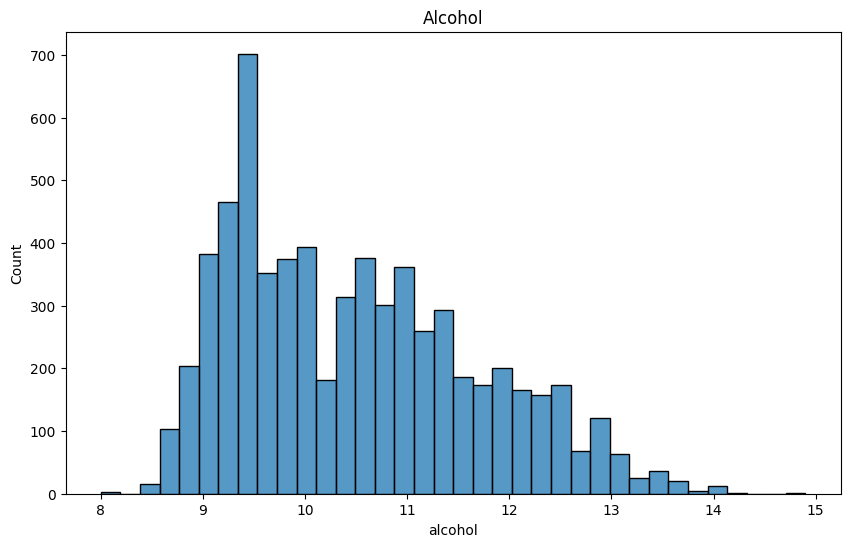

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(vinho['volatile_acidity'], palette='coolwarm')
plt.title('Volatile Acidity')
plt.show()
             
plt.figure(figsize=(10, 6))
sns.histplot(vinho['fixed_acidity'], palette='coolwarm')
plt.title('Fixed Acidity')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['citric_acid'], palette='coolwarm')
plt.title('Citric Acid')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['residual_sugar'], palette='coolwarm')
plt.title('Residual Sugar')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['chlorides'], palette='coolwarm')
plt.title('Chlorides')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['free_sulfur_dioxide'], palette='coolwarm')
plt.title('Free Sulfur Dioxide')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['total_sulfur_dioxide'], palette='coolwarm')
plt.title('Total Sulfur Dioxide')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['density'], palette='coolwarm')
plt.title('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['pH'], palette='coolwarm')
plt.title('PH')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['sulphates'], palette='coolwarm')
plt.title('Sulphates')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(vinho['alcohol'], palette='coolwarm')
plt.title('Alcohol')
plt.show()

In [30]:
#Separando variáveis independente e variável dependente
X = vinho.drop('quality', axis=1)
y = vinho['quality']

In [31]:
#Gerando dataset balanceado
smote = SMOTE(random_state=42, k_neighbors=2)
X_balanceado, y_balanceado = smote.fit_resample(X, y)
y_balanceado.value_counts()

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64

In [32]:
#Normalizando os dados atraez do Míno-Máximo y = (x — min) / (max — min)
X_balanceado_scaler = MinMaxScaler().fit(X_balanceado)
X_balanceado_normalizado = pd.DataFrame(X_balanceado_scaler.transform(X_balanceado),columns=X_balanceado.columns)

In [33]:
X_balanceado_normalizado.describe().T

count      mean       std  min       25%       50%  \
fixed_acidity         19852.0  0.290957  0.100337  0.0  0.231405  0.273573   
volatile_acidity      19852.0  0.189830  0.130605  0.0  0.111976  0.146667   
citric_acid           19852.0  0.193969  0.082081  0.0  0.154378  0.194778   
residual_sugar        19852.0  0.068336  0.063158  0.0  0.021319  0.041411   
chlorides             19852.0  0.072468  0.055412  0.0  0.041228  0.058040   
free_sulfur_dioxide   19852.0  0.102336  0.081626  0.0  0.051617  0.093750   
total_sulfur_dioxide  19852.0  0.250923  0.137728  0.0  0.175000  0.255958   
density               19852.0  0.135730  0.057128  0.0  0.085627  0.134880   
pH                    19852.0  0.402834  0.116793  0.0  0.325581  0.403101   
sulphates             19852.0  0.163901  0.073466  0.0  0.117094  0.146353   
alcohol               19852.0  0.409042  0.183414  0.0  0.249076  0.405797   
style_red             19852.0  0.225771  0.418099  0.0  0.000000  0.000000   
style_white           19852.0  0.824501  0.380403  0.0  1.000000  1.000000   

                           75%  max  
fixed_acidity         0.335409  1.0  
volatile_acidity      0.226667  1.0  
citric_acid           0.246346  1.0  
residual_sugar        0.103923  1.0  
chlorides             0.084718  1.0  
free_sulfur_dioxide   0.128865  1.0  
total_sulfur_dioxide  0.327189  1.0  
density               0.182193  1.0  
pH                    0.478827  1.0  
sulphates             0.196629  1.0  
alcohol               0.565217  1.0  
style_red             0.000000  1.0  
style_white           1.000000  1.0

In [84]:
#Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_balanceado_normalizado, y_balanceado, test_size=0.2, random_state=42)

In [66]:
models = []
models.append(['LR', LogisticRegression(solver='newton-cg')])
models.append(['KNN', KNeighborsClassifier()])
models.append(['CART', DecisionTreeClassifier(max_depth=3,random_state=42)])
models.append(['NB', GaussianNB()])
models.append(['SVM', SVC()])

In [68]:
num_folds = 10
scoring = 'accuracy'

In [74]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.518104 (0.011305)
KNN: 0.806121 (0.009981)
CART: 0.398527 (0.013845)
NB: 0.345822 (0.009784)
SVM: 0.597255 (0.011642)


In [76]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.883320 usando {'metric': 'manhattan', 'n_neighbors': 1}
0.876204 (0.008067): {'metric': 'euclidean', 'n_neighbors': 1}
0.829608 (0.006551): {'metric': 'euclidean', 'n_neighbors': 3}
0.806121 (0.009981): {'metric': 'euclidean', 'n_neighbors': 5}
0.787860 (0.009327): {'metric': 'euclidean', 'n_neighbors': 7}
0.772118 (0.009277): {'metric': 'euclidean', 'n_neighbors': 9}
0.764436 (0.006091): {'metric': 'euclidean', 'n_neighbors': 11}
0.752346 (0.009017): {'metric': 'euclidean', 'n_neighbors': 13}
0.744413 (0.009296): {'metric': 'euclidean', 'n_neighbors': 15}
0.734086 (0.012253): {'metric': 'euclidean', 'n_neighbors': 17}
0.726970 (0.010481): {'metric': 'euclidean', 'n_neighbors': 19}
0.722374 (0.010468): {'metric': 'euclidean', 'n_neighbors': 21}
0.883320 (0.005845): {'metric': 'manhattan', 'n_neighbors': 1}
0.836345 (0.007584): {'metric': 'manhattan', 'n_neighbors': 3}
0.815314 (0.007740): {'metric': 'manhattan', 'n_neighbors': 5}
0.794598 (0.009470): {'metric': 'manhattan', '

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.543781 (0.020914)
KNN: 0.483934 (0.017719)
CART: 0.527421 (0.014358)
NB: 0.345584 (0.040645)
SVM: 0.436993 (0.023223)


In [82]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.576865 usando {'metric': 'manhattan', 'n_neighbors': 1}
0.568779 (0.018514): {'metric': 'euclidean', 'n_neighbors': 1}
0.484314 (0.015004): {'metric': 'euclidean', 'n_neighbors': 3}
0.483934 (0.017719): {'metric': 'euclidean', 'n_neighbors': 5}
0.483935 (0.021460): {'metric': 'euclidean', 'n_neighbors': 7}
0.475850 (0.015140): {'metric': 'euclidean', 'n_neighbors': 9}
0.467188 (0.015060): {'metric': 'euclidean', 'n_neighbors': 11}
0.459108 (0.019036): {'metric': 'euclidean', 'n_neighbors': 13}
0.461416 (0.018091): {'metric': 'euclidean', 'n_neighbors': 15}
0.463341 (0.013023): {'metric': 'euclidean', 'n_neighbors': 17}
0.461027 (0.017165): {'metric': 'euclidean', 'n_neighbors': 19}
0.462375 (0.020798): {'metric': 'euclidean', 'n_neighbors': 21}
0.576865 (0.020427): {'metric': 'manhattan', 'n_neighbors': 1}
0.498161 (0.022342): {'metric': 'manhattan', 'n_neighbors': 3}
0.493544 (0.018533): {'metric': 'manhattan', 'n_neighbors': 5}
0.490282 (0.012069): {'metric': 'manhattan', '

Accuracy score =  0.8909594560564089


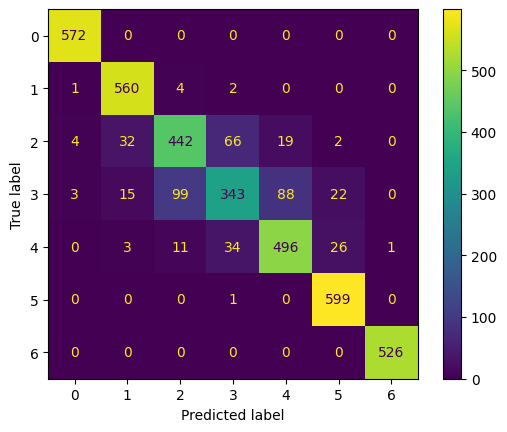

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       572
           4       0.92      0.99      0.95       567
           5       0.79      0.78      0.79       565
           6       0.77      0.60      0.68       570
           7       0.82      0.87      0.84       571
           8       0.92      1.00      0.96       600
           9       1.00      1.00      1.00       526

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.89      0.89      0.89      3971



In [86]:
model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy score =  0.5638461538461539


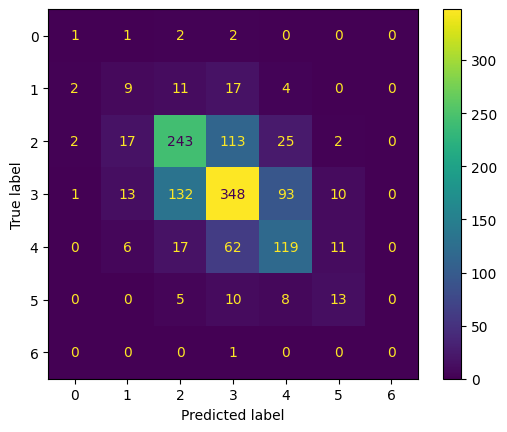

              precision    recall  f1-score   support

           3       0.17      0.17      0.17         6
           4       0.20      0.21      0.20        43
           5       0.59      0.60      0.60       402
           6       0.63      0.58      0.61       597
           7       0.48      0.55      0.51       215
           8       0.36      0.36      0.36        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.57      0.56      0.57      1300



In [90]:
model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions))